In [2]:
import pandas as pd
import numpy as np
from itertools import product

from tqdm import tqdm 

import matplotlib.pyplot as plt
import seaborn as sns

from utils import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
data = pd.read_csv('vodafone_data.csv')

In [4]:
data.head()

Date       Open       High        Low      Close   Volume
0  2016-02-11  29.330000  29.510000  29.030001  29.270000  4805000
1  2016-02-12  29.520000  29.950001  29.410000  29.900000  3116500
2  2016-02-16  29.950001  30.420000  29.900000  30.260000  4037900
3  2016-02-17  31.000000  31.320000  30.900000  31.090000  4313800
4  2016-02-18  31.090000  31.150000  30.920000  30.959999  3522800

## Експлоративний аналіз даних

In [5]:
data['Date'] = pd.to_datetime(data['Date']).dt.date
data['Date_index'] = pd.DatetimeIndex(data.Date)

In [6]:
data['year'] = pd.to_datetime(data['Date']).dt.year
data['quarter'] = pd.to_datetime(data['Date']).dt.quarter
data['month'] = pd.to_datetime(data['Date']).dt.month

In [7]:
data.Date.agg({min, max})

min    2016-02-11
max    2021-02-11
Name: Date, dtype: object

In [8]:
data.shape

(1260, 10)

### Розподіл значень ряду по роках

#### Розподіл кількості значень ряду по роках

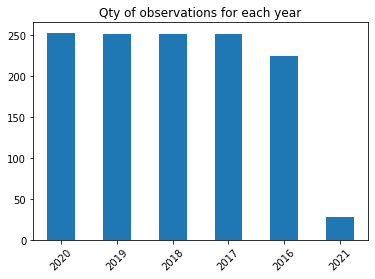

In [9]:
data.year.value_counts().plot(kind='bar', rot='45');
plt.title('Qty of observations for each year');

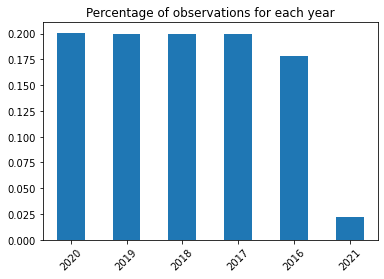

In [10]:
data.year.value_counts(normalize=True).plot(kind='bar', rot='45');
plt.title('Percentage of observations for each year');

##### Бачимо, що значення часового ряду розподілені практично рівномірно по роках

#### Розподіл значень ряду

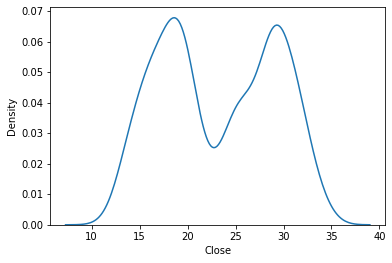

In [11]:
sns.kdeplot(data.Close);

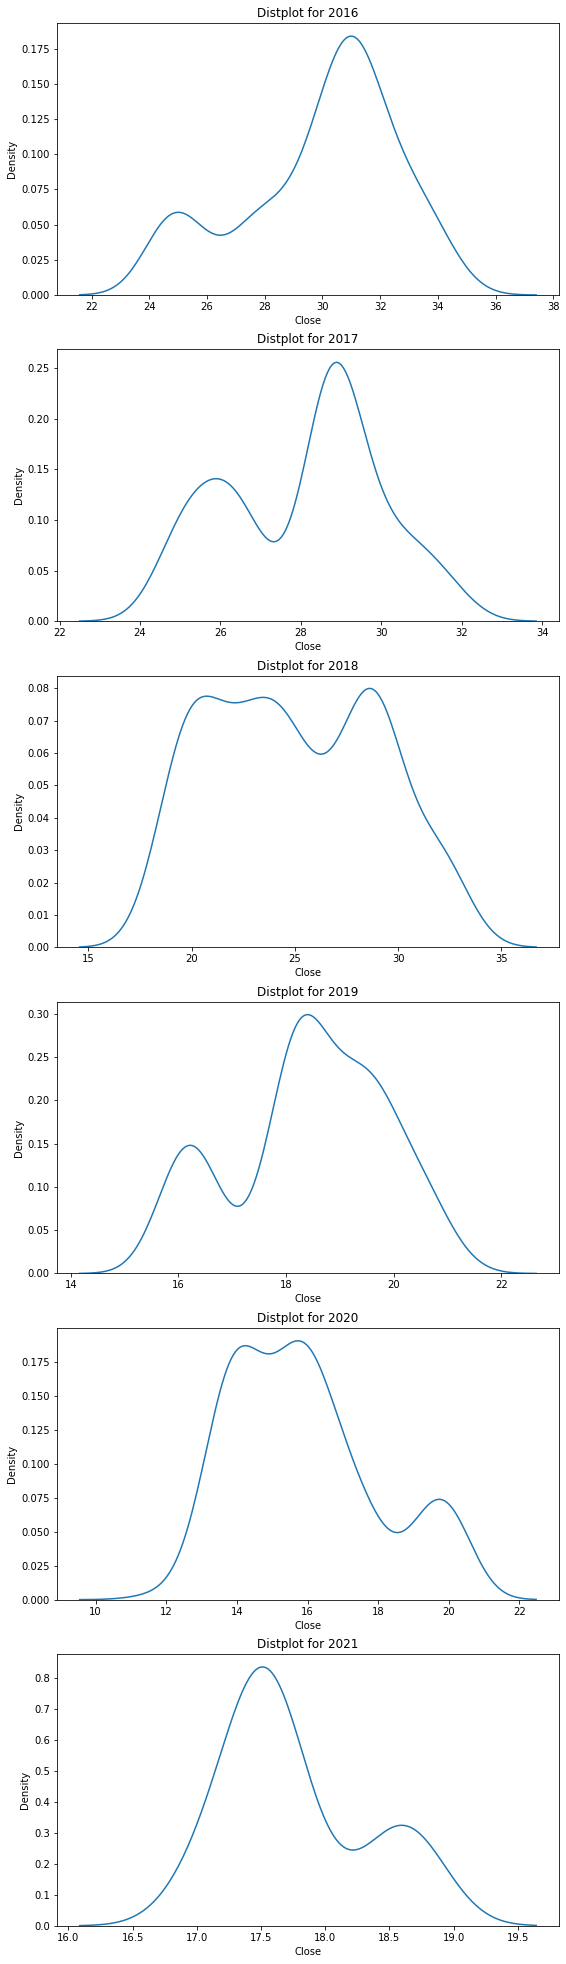

In [12]:
fig, axs = plt.subplots(nrows=data.year.nunique(), ncols=1, figsize=(9, 35))

for idx, year in enumerate(data.year.unique()):
    sns.kdeplot(data.loc[data.year == year, 'Close'], ax=axs[idx]);
    axs[idx].set_title('Distplot for {}'.format(year));

##### Розподіл значень по роках дає певні "натяки" на наявність негативного тренду

### Аналіз пропущених значень

In [13]:
missing_dates = pd.date_range(start='2016-02-11', end='2021-02-11', freq='D').difference(data.Date)

In [14]:
# we have 568 missing dates
missing_dates.nunique()

568

In [15]:
missing_dates

DatetimeIndex(['2016-02-13', '2016-02-14', '2016-02-15', '2016-02-20',
               '2016-02-21', '2016-02-27', '2016-02-28', '2016-03-05',
               '2016-03-06', '2016-03-12',
               ...
               '2021-01-10', '2021-01-16', '2021-01-17', '2021-01-18',
               '2021-01-23', '2021-01-24', '2021-01-30', '2021-01-31',
               '2021-02-06', '2021-02-07'],
              dtype='datetime64[ns]', length=568, freq=None)

In [16]:
missing_dates = pd.DataFrame(missing_dates, columns=['date'])
missing_dates['year'] = missing_dates['date'].dt.year

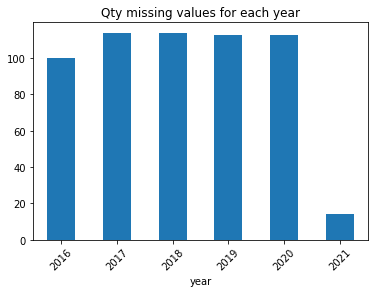

In [17]:
missing_dates.groupby('year').date.count().plot(kind='bar', rot='45');
plt.title('Qty missing values for each year');

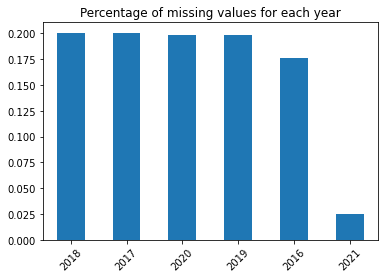

In [18]:
missing_dates.year.value_counts(normalize=True).plot(kind='bar', rot='45');
plt.title('Percentage of missing values for each year');

In [19]:
missing_dates['month'] = missing_dates['date'].dt.month
missing_dates['day'] = missing_dates['date'].dt.day

In [20]:
missing_dates.head()

date  year  month  day
0 2016-02-13  2016      2   13
1 2016-02-14  2016      2   14
2 2016-02-15  2016      2   15
3 2016-02-20  2016      2   20
4 2016-02-21  2016      2   21

In [21]:
missing_dates.day.value_counts(normalize=True).head()

25    0.040493
4     0.038732
1     0.036972
2     0.035211
3     0.035211
Name: day, dtype: float64

In [22]:
missing_dates.month.value_counts(normalize=True).head()

1     0.093310
12    0.091549
7     0.088028
9     0.086268
5     0.084507
Name: month, dtype: float64

### Лінійна інтерполяція для обробки пропущених значень

In [23]:
data.head()

Date       Open       High        Low      Close   Volume Date_index  \
0  2016-02-11  29.330000  29.510000  29.030001  29.270000  4805000 2016-02-11   
1  2016-02-12  29.520000  29.950001  29.410000  29.900000  3116500 2016-02-12   
2  2016-02-16  29.950001  30.420000  29.900000  30.260000  4037900 2016-02-16   
3  2016-02-17  31.000000  31.320000  30.900000  31.090000  4313800 2016-02-17   
4  2016-02-18  31.090000  31.150000  30.920000  30.959999  3522800 2016-02-18   

   year  quarter  month  
0  2016        1      2  
1  2016        1      2  
2  2016        1      2  
3  2016        1      2  
4  2016        1      2

In [24]:
data_no_missing = data.copy(deep=True)

In [25]:
data_no_missing.head()

Date       Open       High        Low      Close   Volume Date_index  \
0  2016-02-11  29.330000  29.510000  29.030001  29.270000  4805000 2016-02-11   
1  2016-02-12  29.520000  29.950001  29.410000  29.900000  3116500 2016-02-12   
2  2016-02-16  29.950001  30.420000  29.900000  30.260000  4037900 2016-02-16   
3  2016-02-17  31.000000  31.320000  30.900000  31.090000  4313800 2016-02-17   
4  2016-02-18  31.090000  31.150000  30.920000  30.959999  3522800 2016-02-18   

   year  quarter  month  
0  2016        1      2  
1  2016        1      2  
2  2016        1      2  
3  2016        1      2  
4  2016        1      2

In [26]:
data_no_missing = data_no_missing.set_index('Date_index').asfreq('D')

In [27]:
data_no_missing.head()

Date   Open       High        Low  Close     Volume    year  \
Date_index                                                                      
2016-02-11  2016-02-11  29.33  29.510000  29.030001  29.27  4805000.0  2016.0   
2016-02-12  2016-02-12  29.52  29.950001  29.410000  29.90  3116500.0  2016.0   
2016-02-13         NaN    NaN        NaN        NaN    NaN        NaN     NaN   
2016-02-14         NaN    NaN        NaN        NaN    NaN        NaN     NaN   
2016-02-15         NaN    NaN        NaN        NaN    NaN        NaN     NaN   

            quarter  month  
Date_index                  
2016-02-11      1.0    2.0  
2016-02-12      1.0    2.0  
2016-02-13      NaN    NaN  
2016-02-14      NaN    NaN  
2016-02-15      NaN    NaN

In [28]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    data_no_missing[col] = data_no_missing[col].interpolate()

In [29]:
data_no_missing.head()

Date       Open       High        Low  Close     Volume  \
Date_index                                                                  
2016-02-11  2016-02-11  29.330000  29.510000  29.030001  29.27  4805000.0   
2016-02-12  2016-02-12  29.520000  29.950001  29.410000  29.90  3116500.0   
2016-02-13         NaN  29.627500  30.067501  29.532500  29.99  3346850.0   
2016-02-14         NaN  29.735000  30.185001  29.655000  30.08  3577200.0   
2016-02-15         NaN  29.842501  30.302500  29.777500  30.17  3807550.0   

              year  quarter  month  
Date_index                          
2016-02-11  2016.0      1.0    2.0  
2016-02-12  2016.0      1.0    2.0  
2016-02-13     NaN      NaN    NaN  
2016-02-14     NaN      NaN    NaN  
2016-02-15     NaN      NaN    NaN

In [30]:
data_no_missing = data_no_missing.reset_index(drop=False)

In [31]:
data_no_missing.head(3)

Date_index        Date     Open       High        Low  Close     Volume  \
0 2016-02-11  2016-02-11  29.3300  29.510000  29.030001  29.27  4805000.0   
1 2016-02-12  2016-02-12  29.5200  29.950001  29.410000  29.90  3116500.0   
2 2016-02-13         NaN  29.6275  30.067501  29.532500  29.99  3346850.0   

     year  quarter  month  
0  2016.0      1.0    2.0  
1  2016.0      1.0    2.0  
2     NaN      NaN    NaN

In [32]:
data_no_missing['Date'] = pd.to_datetime(data_no_missing['Date_index']).dt.date
data_no_missing['year'] = pd.to_datetime(data_no_missing['Date']).dt.year
data_no_missing['quarter'] = pd.to_datetime(data_no_missing['Date']).dt.quarter
data_no_missing['month'] = pd.to_datetime(data_no_missing['Date']).dt.month

In [33]:
data_no_missing.head()

Date_index        Date       Open       High        Low  Close     Volume  \
0 2016-02-11  2016-02-11  29.330000  29.510000  29.030001  29.27  4805000.0   
1 2016-02-12  2016-02-12  29.520000  29.950001  29.410000  29.90  3116500.0   
2 2016-02-13  2016-02-13  29.627500  30.067501  29.532500  29.99  3346850.0   
3 2016-02-14  2016-02-14  29.735000  30.185001  29.655000  30.08  3577200.0   
4 2016-02-15  2016-02-15  29.842501  30.302500  29.777500  30.17  3807550.0   

   year  quarter  month  
0  2016        1      2  
1  2016        1      2  
2  2016        1      2  
3  2016        1      2  
4  2016        1      2

### Аналіз наявності викидів в даних

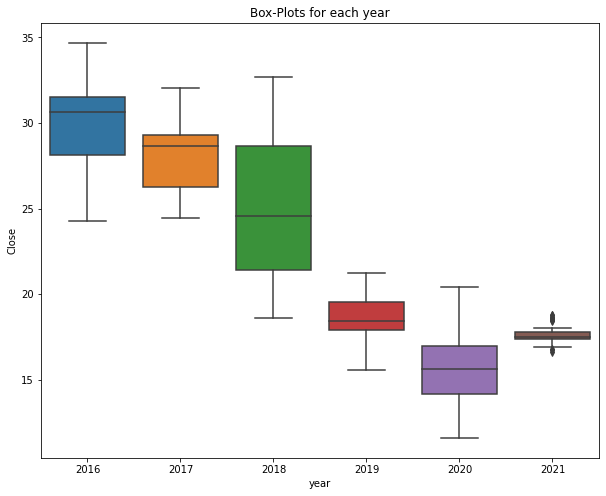

In [34]:
fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=data_no_missing, x=data_no_missing.year, y='Close');
plt.title('Box-Plots for each year');

#### Бачимо, що часовий ряд є досить "чистим", також проглядається негативний тренд

### Аналіз наявності тренду, сезонності, циклічності

#### Візуалізація часового ряду

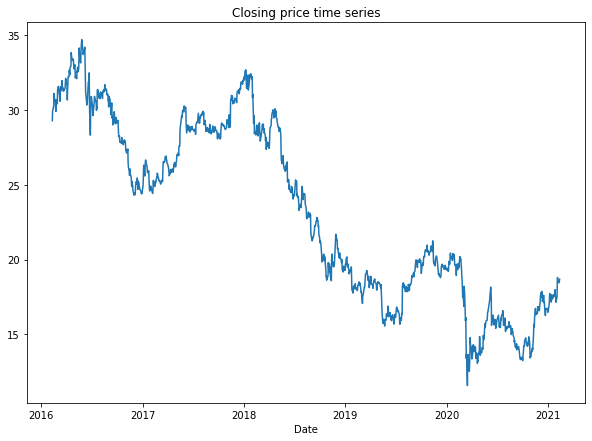

In [35]:
data_no_missing.set_index('Date').Close.plot(title='Closing price time series', figsize=(10, 7));

#### Візуалізація значень часового ряду у розбитті по рокам

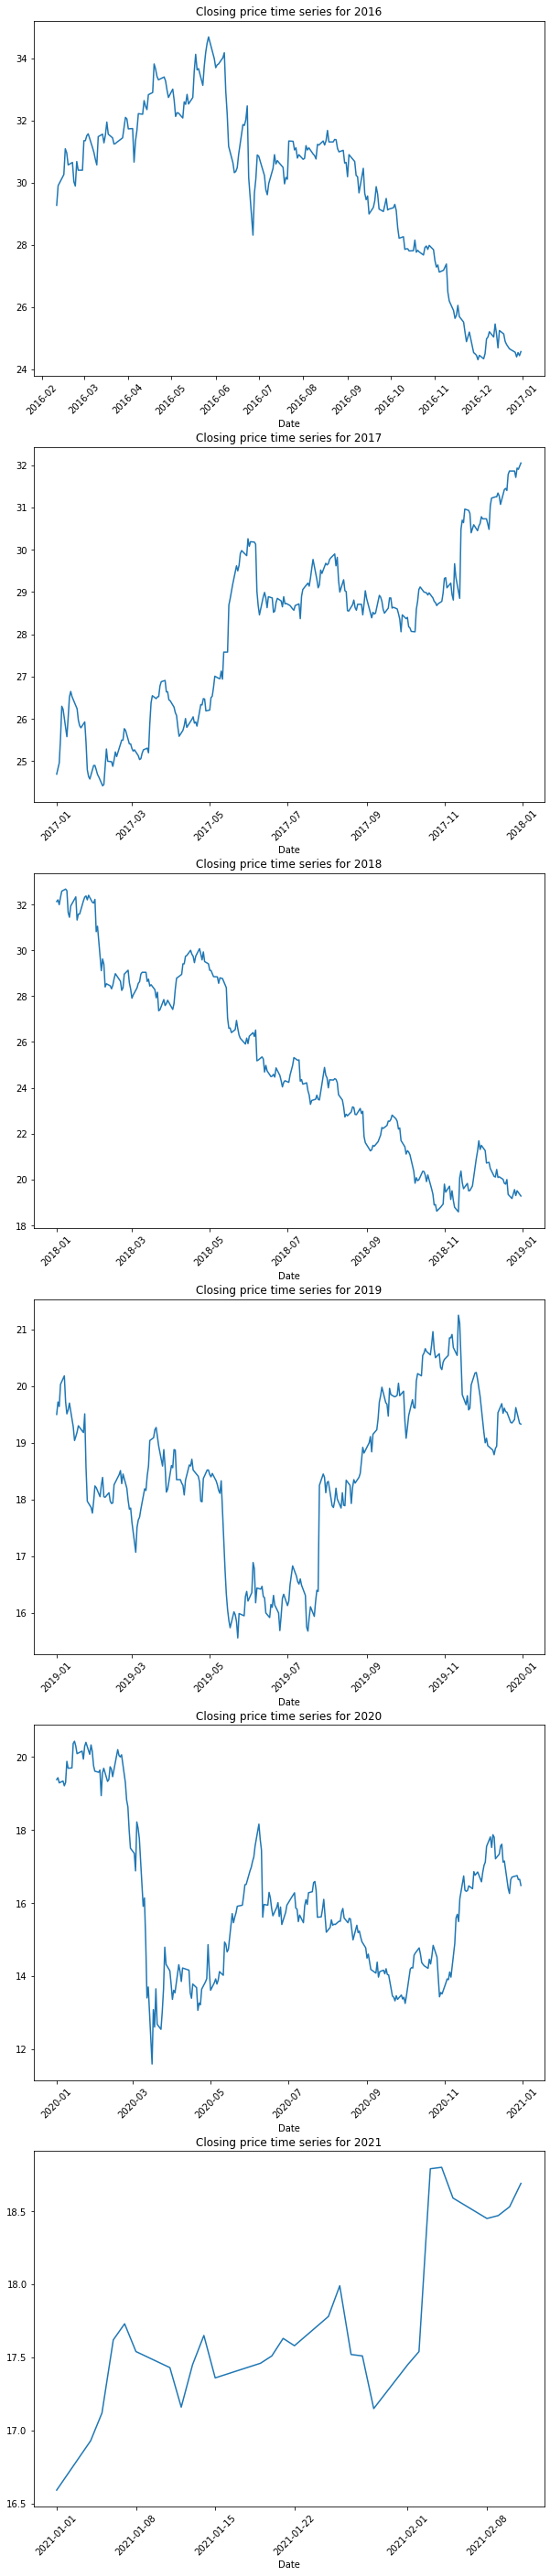

In [36]:
fig, axs = plt.subplots(nrows=data.year.nunique(), ncols=1, figsize=(10, 50))

for idx, year in enumerate(data.year.unique()):
    
    data_no_missing[data_no_missing.year == year].set_index('Date').Close.plot(
        title='Closing price time series for {}'.format(year), ax=axs[idx], rot='45');

#### Поквартальна візуалізація значень часового ряду

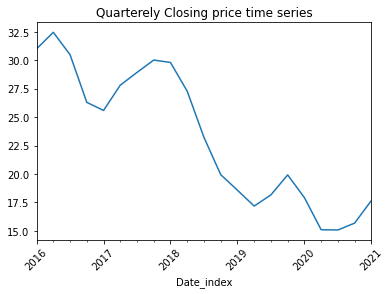

In [37]:
data_no_missing.set_index('Date_index').Close.resample('Q').mean().plot(
        title='Quarterely Closing price time series', rot='45');

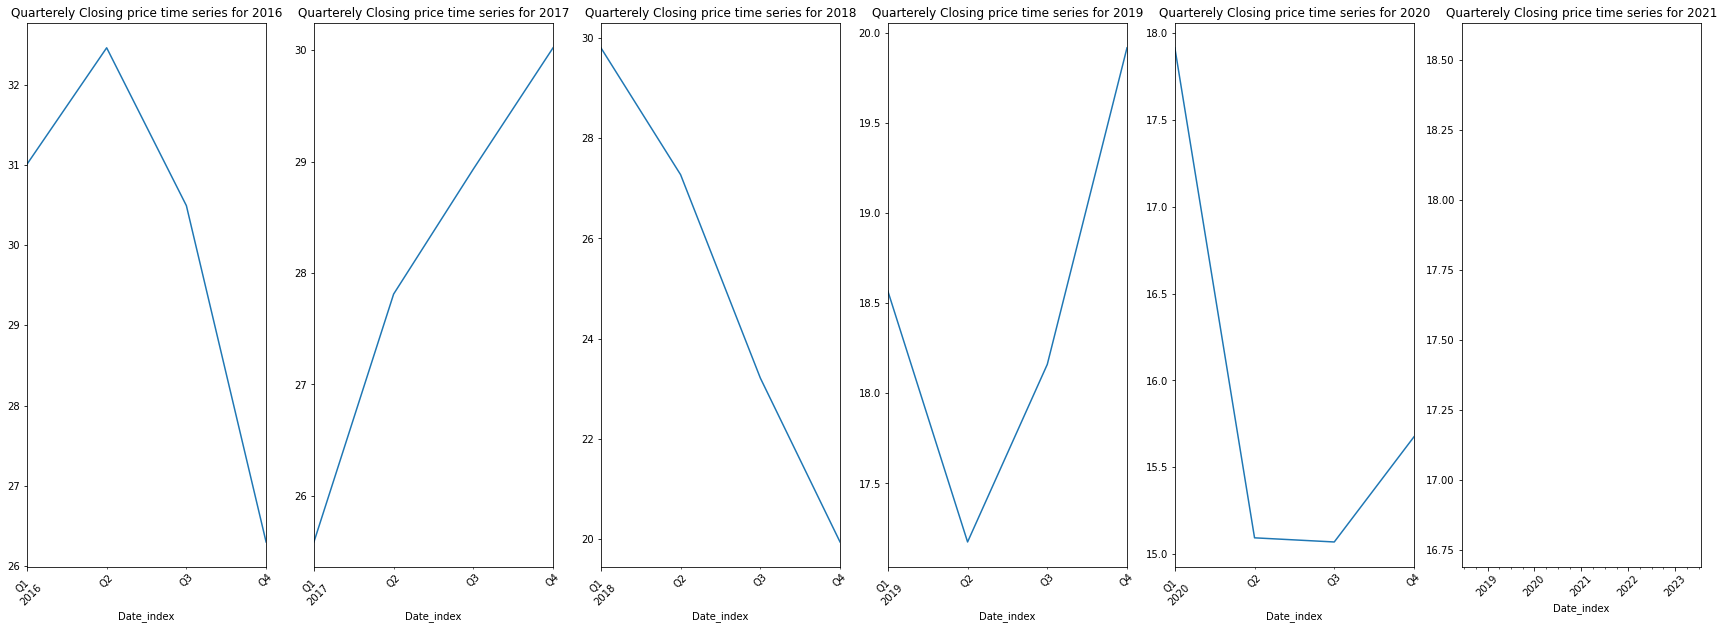

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=data.year.nunique(), figsize=(30, 10))

for idx, year in enumerate(data.year.unique()):
    
    data_no_missing[data_no_missing.year == year].set_index('Date_index').Close.resample('Q').mean().plot(
        title='Quarterely Closing price time series for {}'.format(year), ax=axs[idx], rot='45');

#### Помісячна візуалізація значень часового ряду

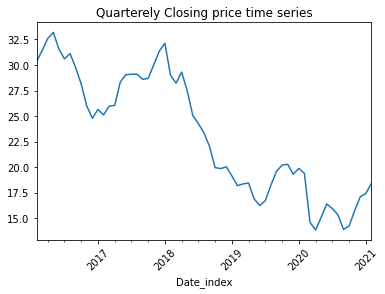

In [39]:
data_no_missing.set_index('Date_index').Close.resample('M').mean().plot(
        title='Quarterely Closing price time series', rot='45');

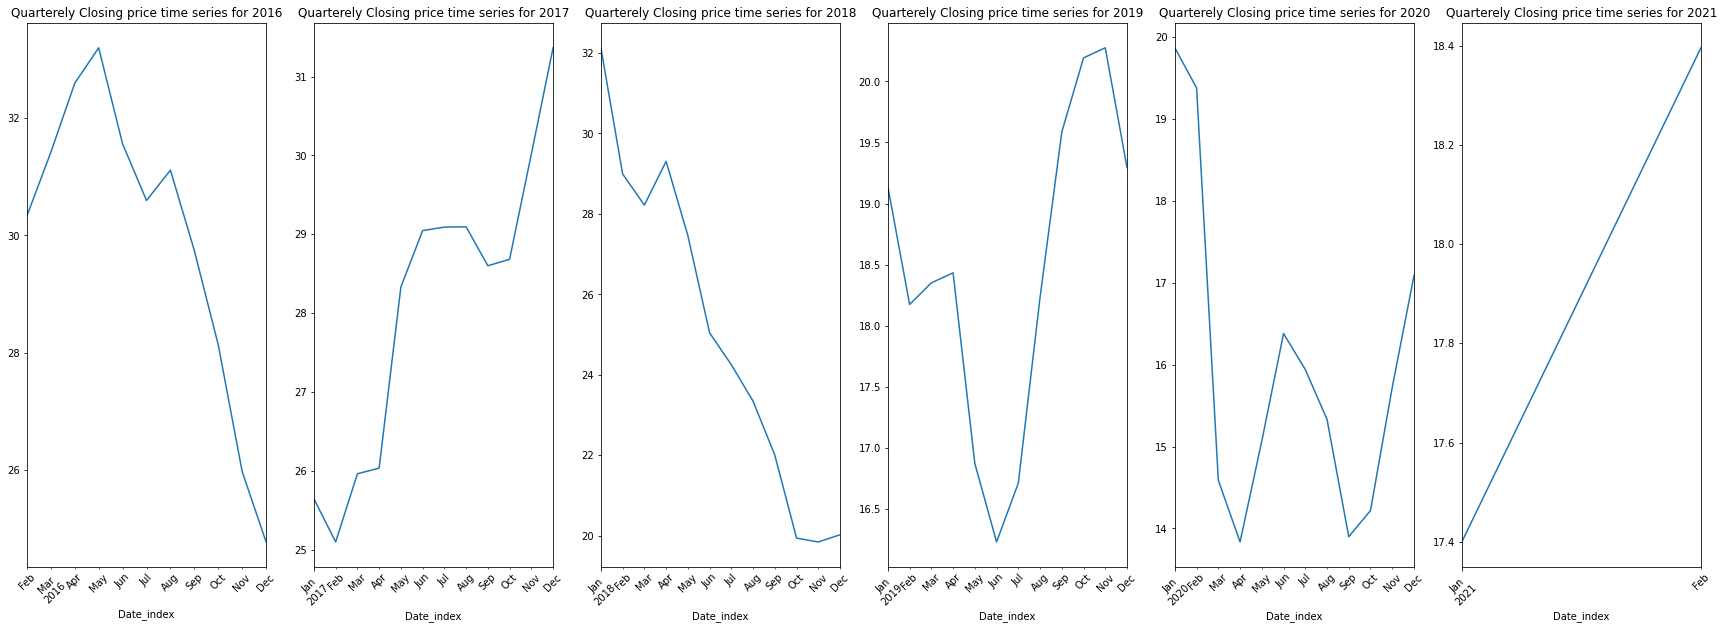

In [40]:
fig, axs = plt.subplots(nrows=1, ncols=data.year.nunique(), figsize=(30, 10))

for idx, year in enumerate(data.year.unique()):
    
    data_no_missing[data_no_missing.year == year].set_index('Date_index').Close.resample('M').mean().plot(
        title='Quarterely Closing price time series for {}'.format(year), ax=axs[idx], rot='45');

##### Наведені графіки свідчать про наявність так званого "mean-revesring" тренду

### Перевірка на стаціонарність

#### Тест Дікі-Фулера

In [41]:
stationarity_test(data_no_missing.Close, smt.adfuller)

{'adfuller_statistics': -1.2810249204236723,
 'adfuller_p_value': 0.63780811113391,
 'adfuller_critical_values': {'1%': -3.4339382310452033,
  '5%': -2.863125003847544,
  '10%': -2.56761380228936}}

#### KPSS тест

In [42]:
stationarity_test(data_no_missing.Close, smt.kpss)

{'kpss_statistics': 5.98948825089506,
 'kpss_p_value': 0.01,
 'kpss_critical_values': {'10%': 0.347,
  '5%': 0.463,
  '2.5%': 0.574,
  '1%': 0.739}}

#### Бачимо, що вихідний часовий ряд не є стаціонарним

### Декомпозиція часового ряду

In [43]:
data_no_missing.head(1)

Date_index        Date   Open   High        Low  Close     Volume  year  \
0 2016-02-11  2016-02-11  29.33  29.51  29.030001  29.27  4805000.0  2016   

   quarter  month  
0        1      2

In [44]:
data_no_missing = data_no_missing.set_index('Date_index')

#### Additive model

##### period=5

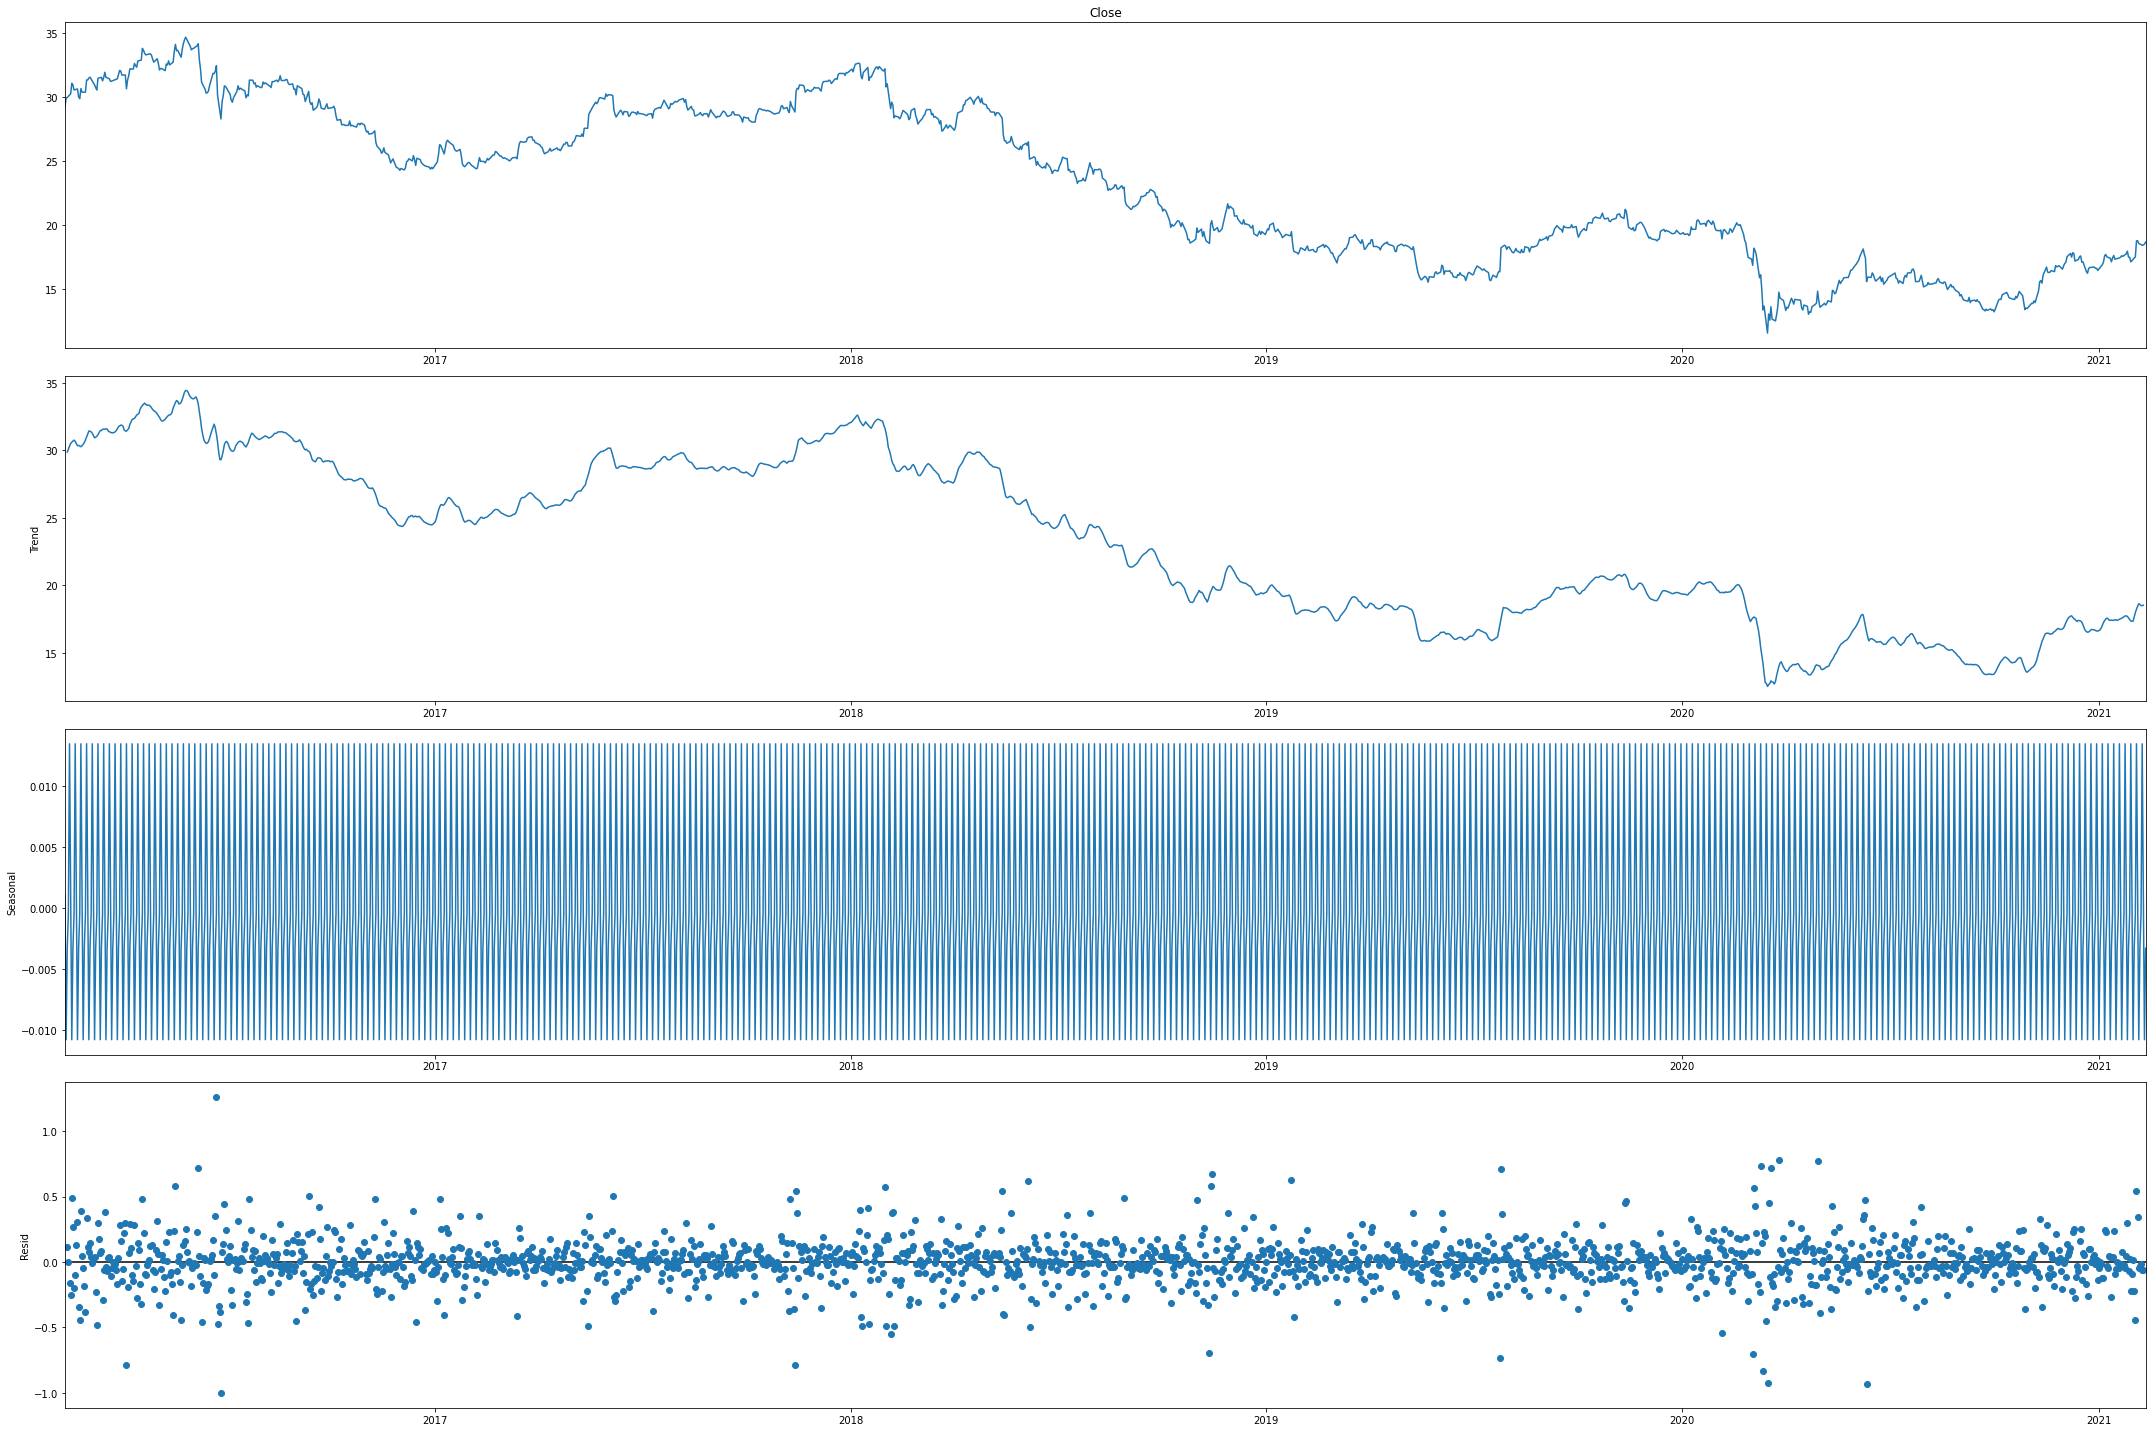

In [45]:
sesonal_decomposition_additive_5 = plot_decomposition(data_no_missing.Close, 'additive', 5)

##### Тест на стаціонарність для залишків

In [46]:
stationarity_test(sesonal_decomposition_additive_5.resid.dropna(), smt.adfuller)

{'adfuller_statistics': -15.8271072749015,
 'adfuller_p_value': 1.0043291380950998e-28,
 'adfuller_critical_values': {'1%': -3.4339840952648695,
  '5%': -2.8631452508003057,
  '10%': -2.567624583142913}}

In [47]:
stationarity_test(sesonal_decomposition_additive_5.resid.dropna(), smt.kpss)

{'kpss_statistics': 0.011048183295121446,
 'kpss_p_value': 0.1,
 'kpss_critical_values': {'10%': 0.347,
  '5%': 0.463,
  '2.5%': 0.574,
  '1%': 0.739}}

#### Additive model

##### period=20

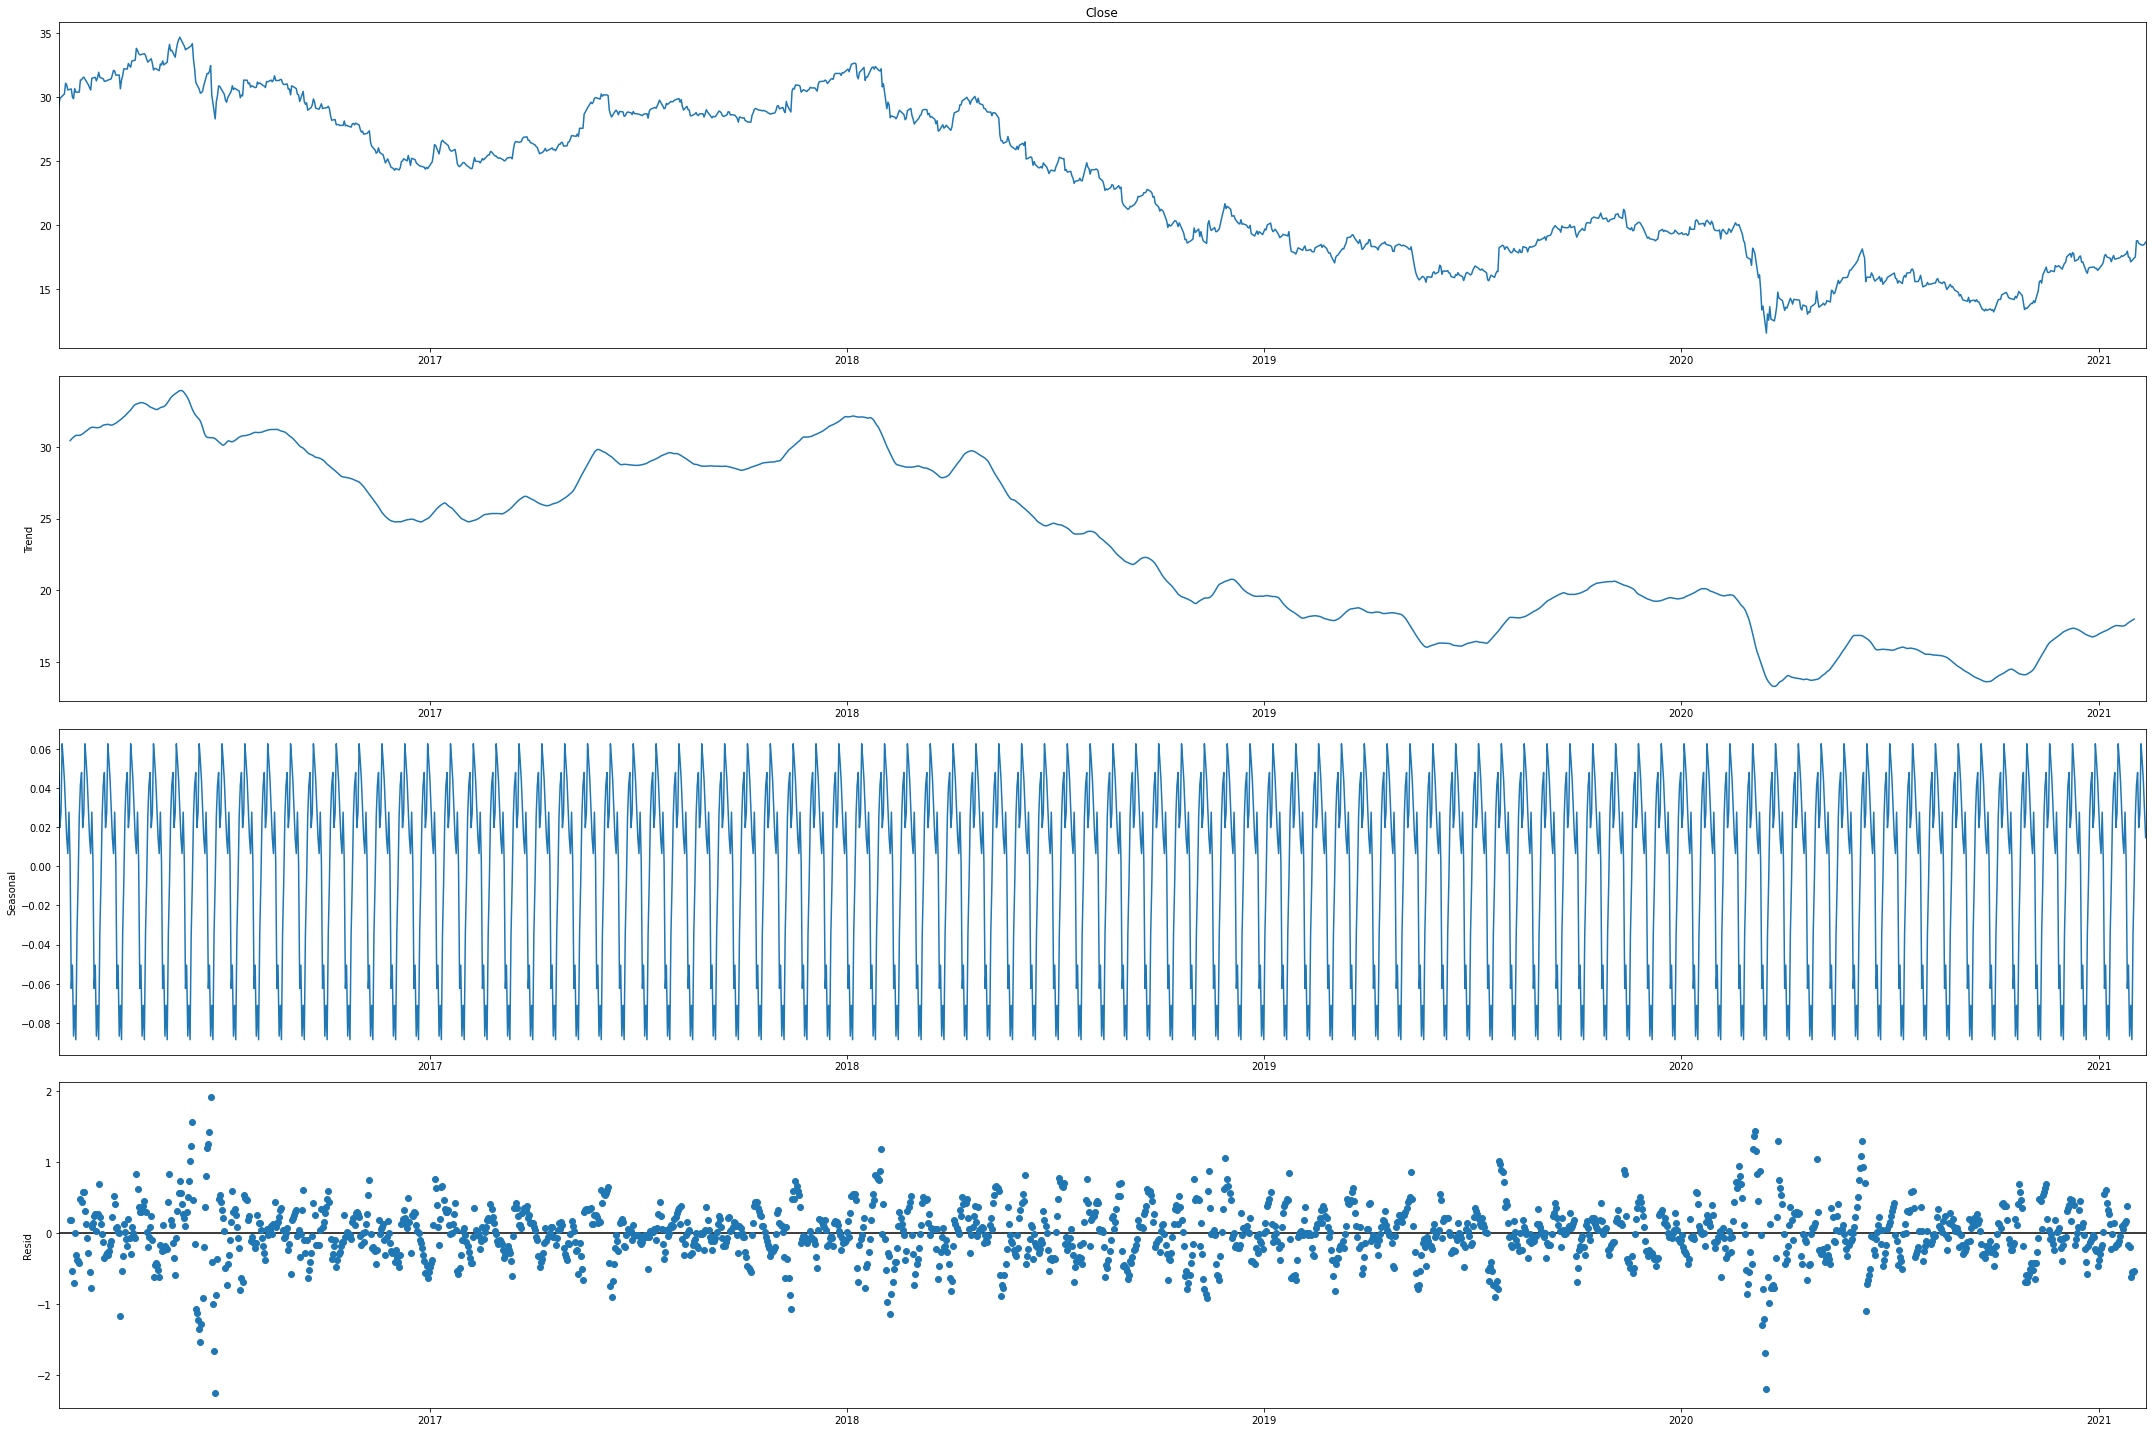

In [48]:
sesonal_decomposition_additive_20 = plot_decomposition(data_no_missing.Close, 'additive', 20)

##### Тест на стаціонарність для залишків

In [49]:
stationarity_test(sesonal_decomposition_additive_20.resid.dropna(), smt.adfuller)

{'adfuller_statistics': -12.92787036050939,
 'adfuller_p_value': 3.754426786446961e-24,
 'adfuller_critical_values': {'1%': -3.434022876868246,
  '5%': -2.8631623708604996,
  '10%': -2.5676336990659903}}

In [50]:
stationarity_test(sesonal_decomposition_additive_20.resid.dropna(), smt.kpss)

{'kpss_statistics': 0.012725962247832222,
 'kpss_p_value': 0.1,
 'kpss_critical_values': {'10%': 0.347,
  '5%': 0.463,
  '2.5%': 0.574,
  '1%': 0.739}}

#### Additive model

##### period=253

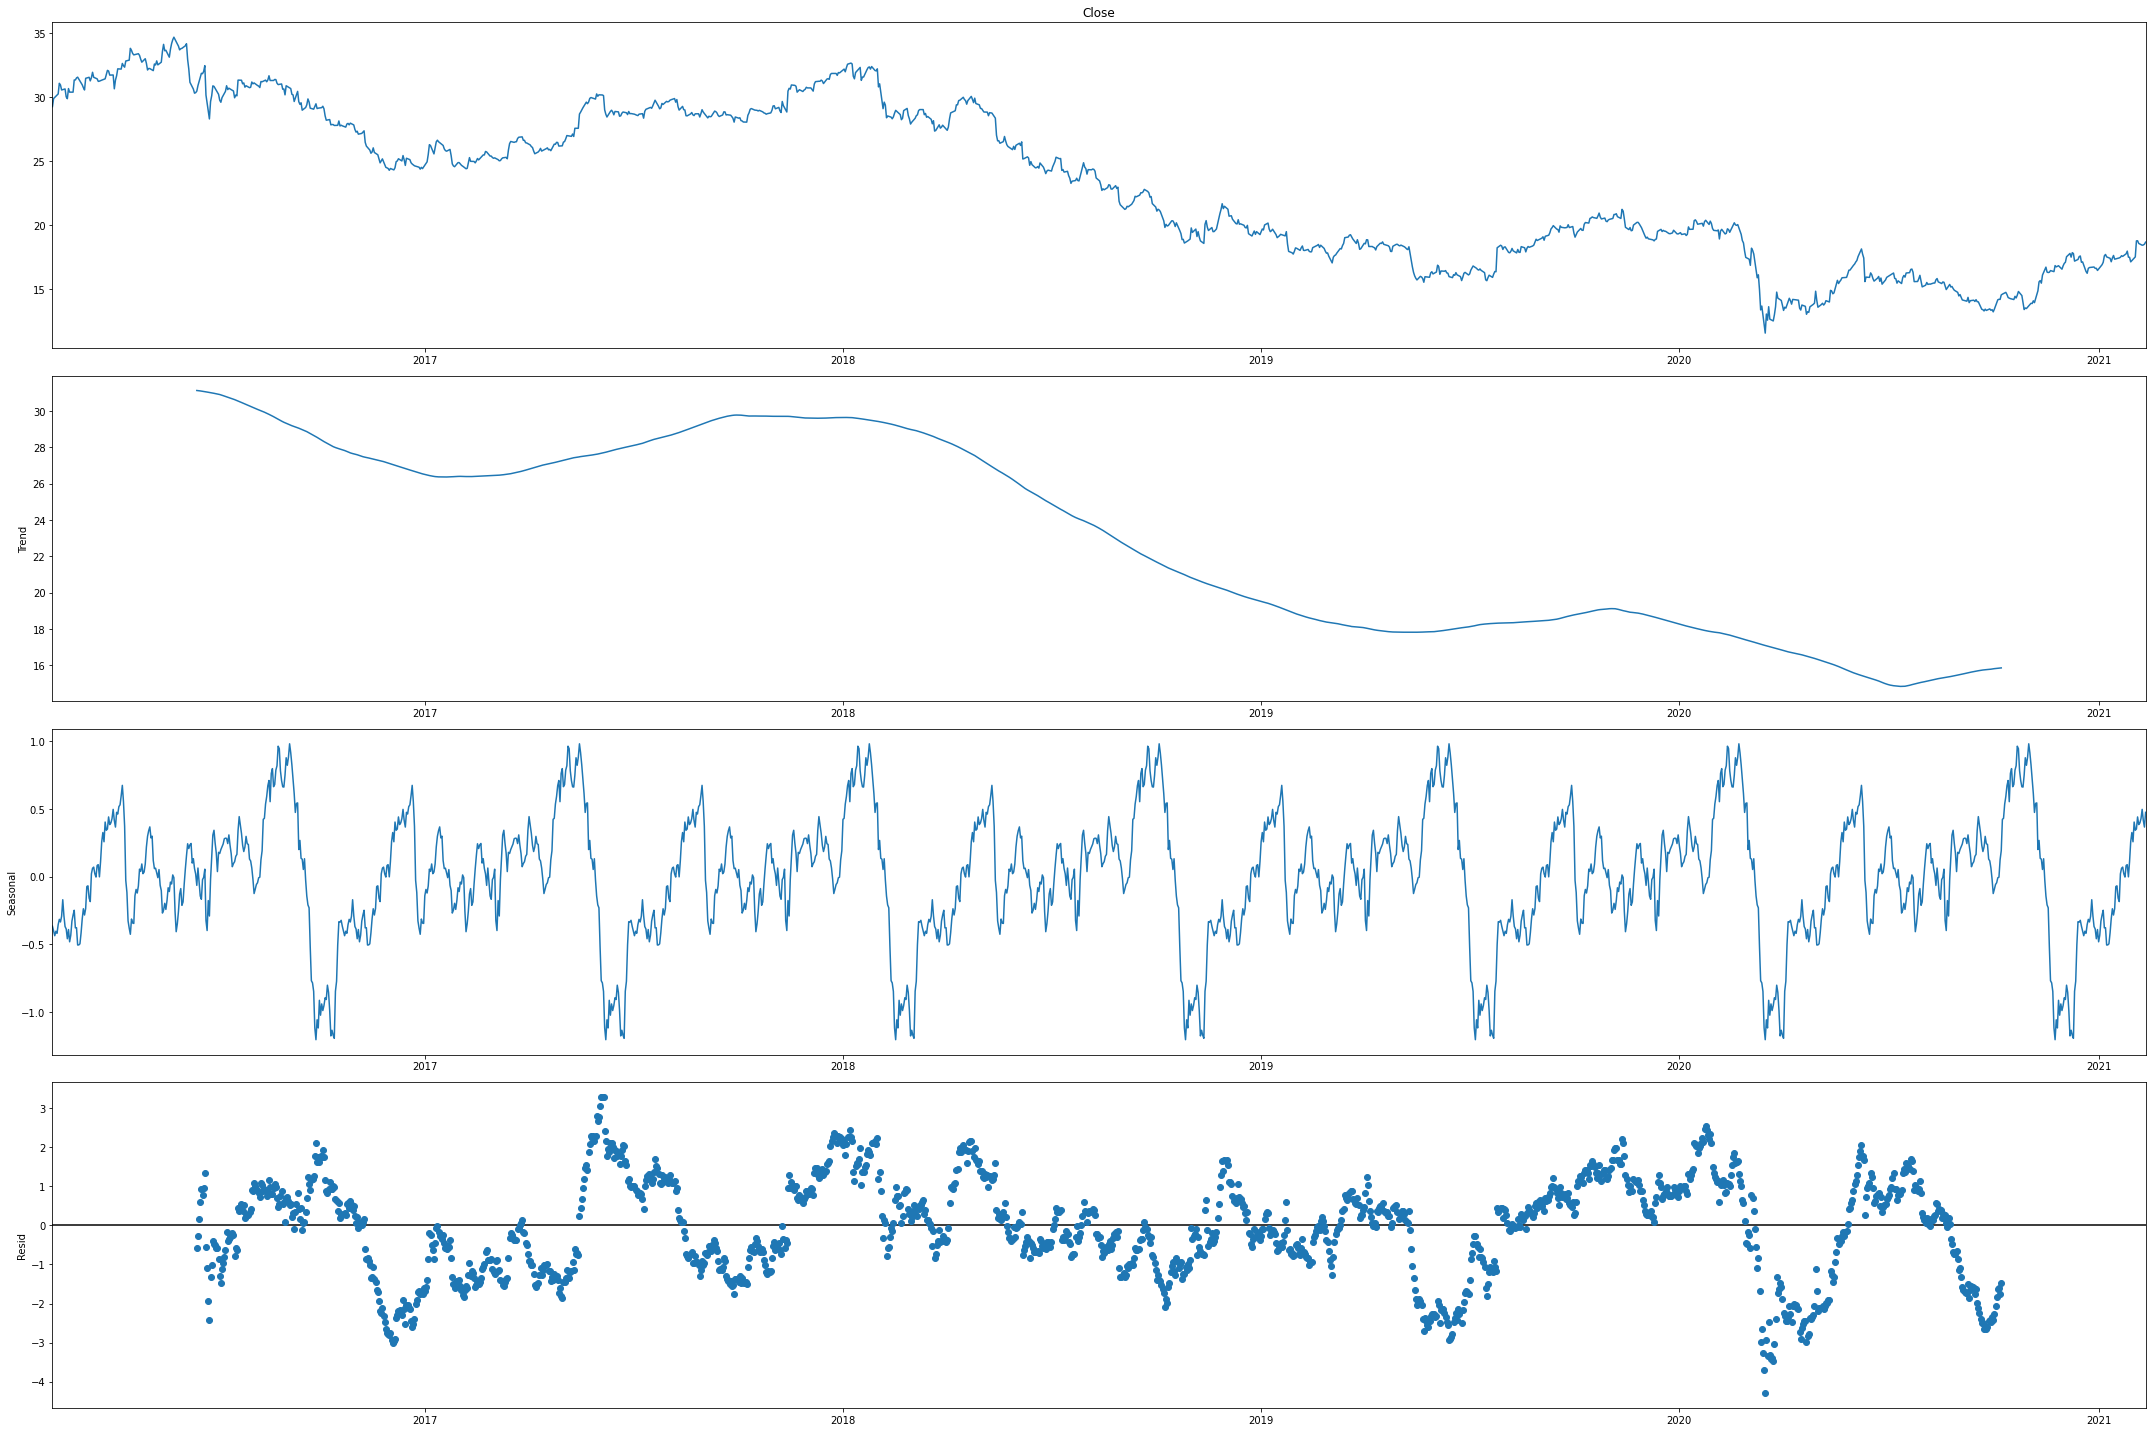

In [51]:
sesonal_decomposition_additive_253 = plot_decomposition(data_no_missing.Close, 'additive', 253)

##### Тест на стаціонарність для залишків

In [52]:
stationarity_test(sesonal_decomposition_additive_253.resid.dropna(), smt.adfuller)

{'adfuller_statistics': -4.317859037108565,
 'adfuller_p_value': 0.000413621436312785,
 'adfuller_critical_values': {'1%': -3.4345140199818918,
  '5%': -2.8633791658322503,
  '10%': -2.567749139071643}}

In [53]:
stationarity_test(sesonal_decomposition_additive_253.resid.dropna(), smt.kpss)

{'kpss_statistics': 0.09266132310912872,
 'kpss_p_value': 0.1,
 'kpss_critical_values': {'10%': 0.347,
  '5%': 0.463,
  '2.5%': 0.574,
  '1%': 0.739}}

#### Multiplicative model

##### period=5

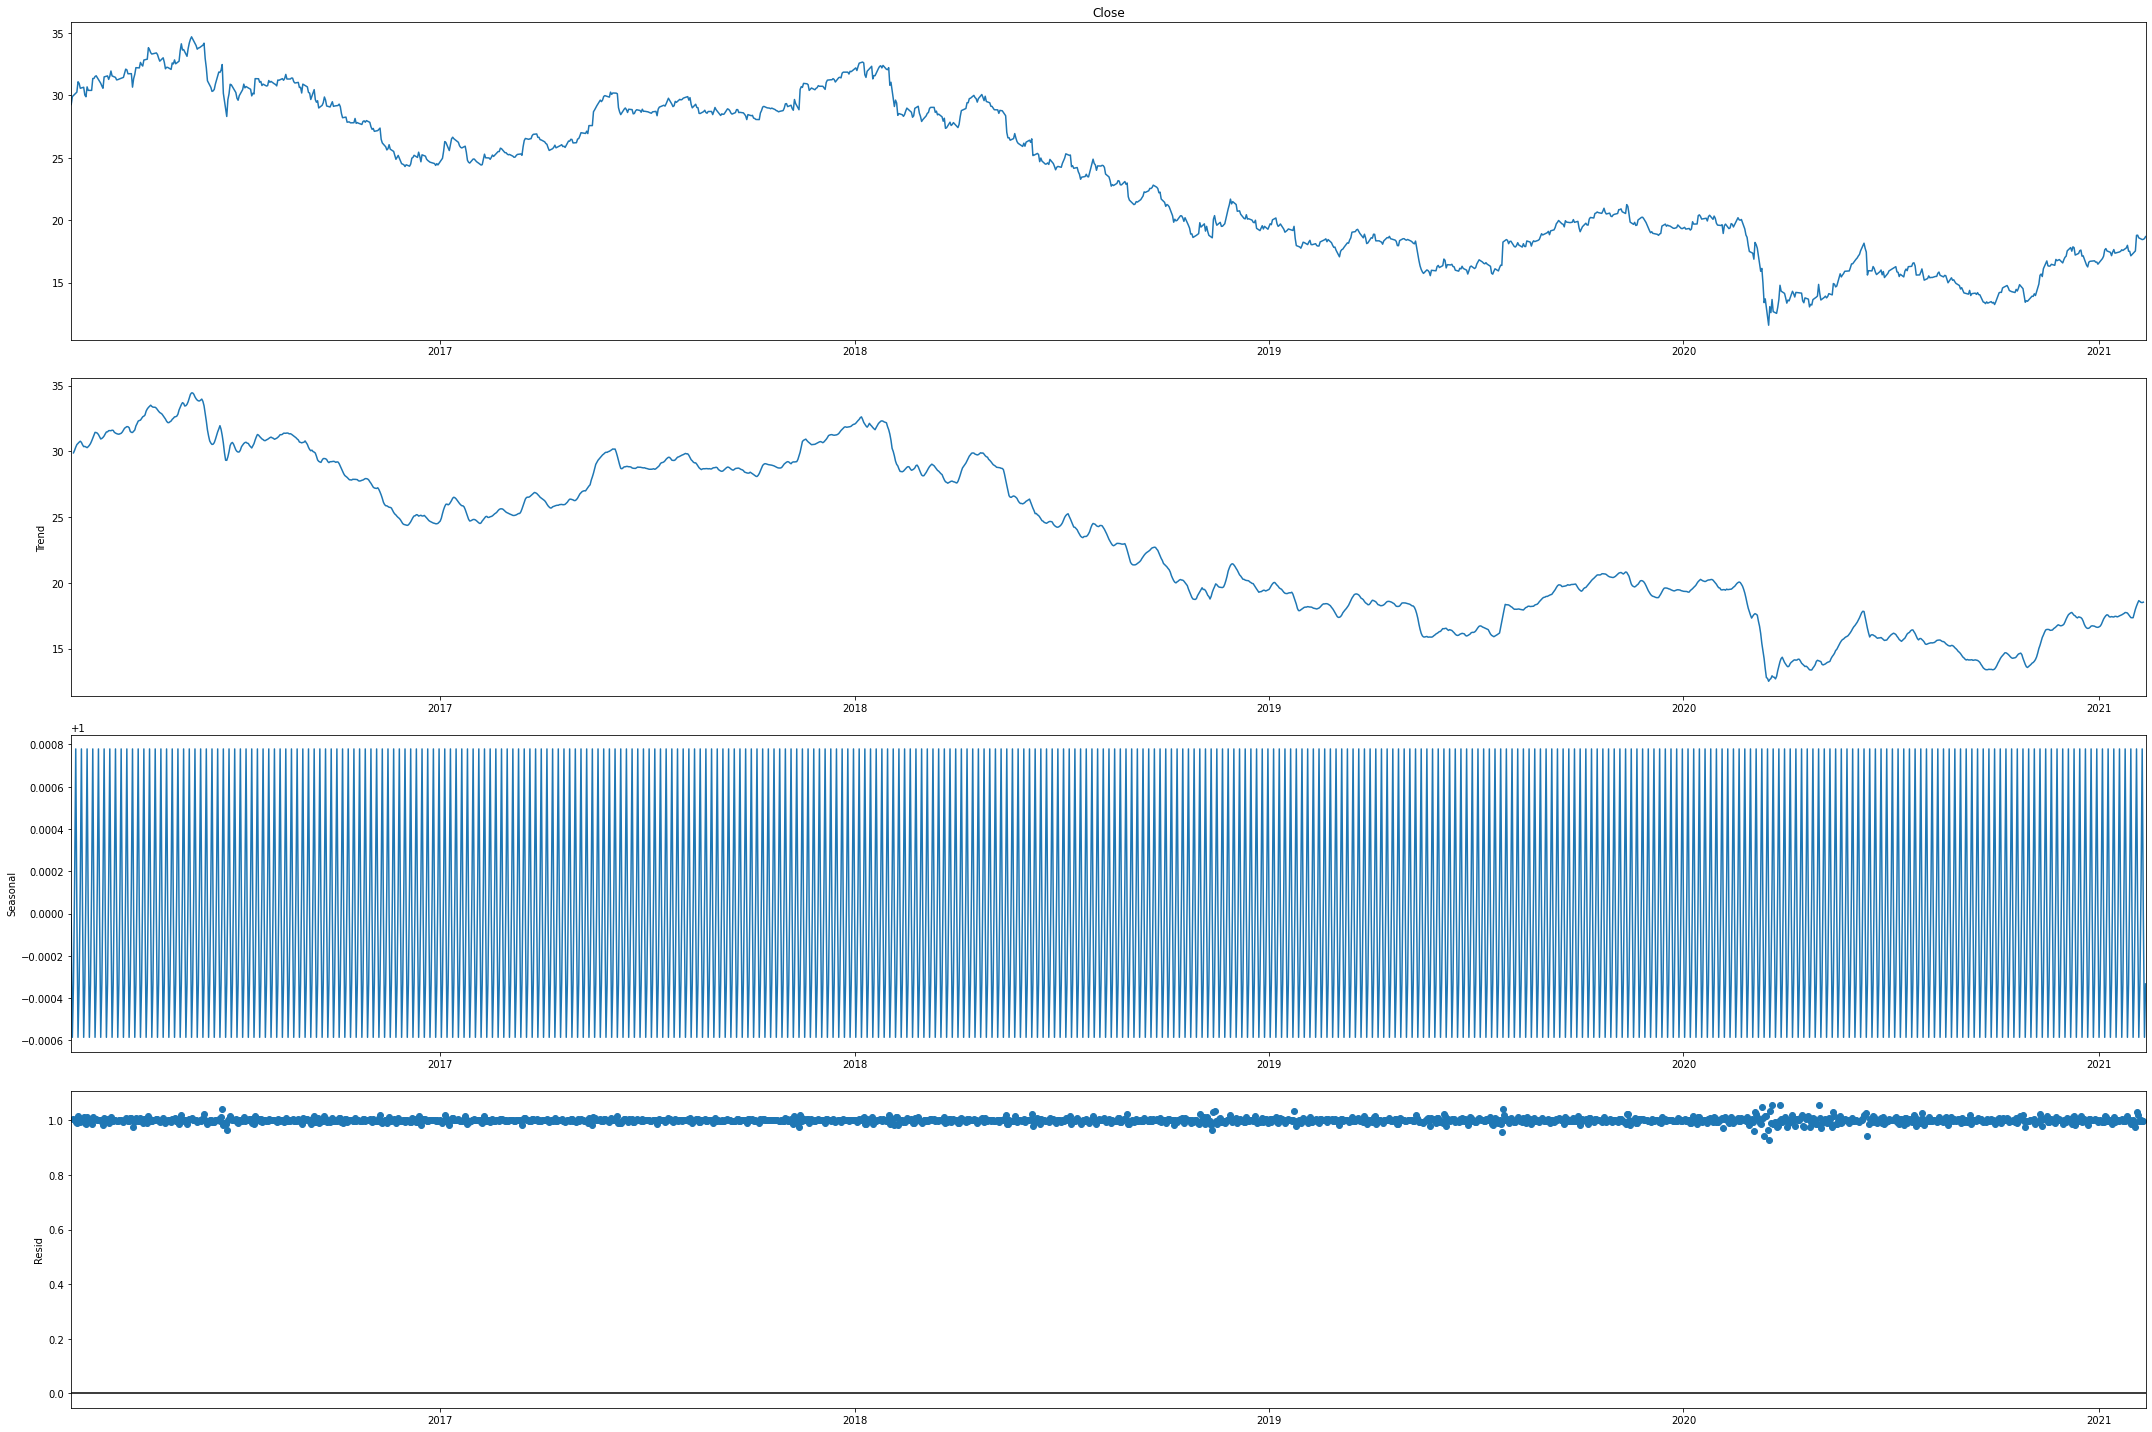

In [54]:
sesonal_decomposition_multiplicative_5 = plot_decomposition(data_no_missing.Close, 'multiplicative', 5)

##### Тест на стаціонарність для залишків

In [55]:
stationarity_test(sesonal_decomposition_multiplicative_5.resid.dropna(), smt.adfuller)

{'adfuller_statistics': -15.13311575225083,
 'adfuller_p_value': 7.1846792792620545e-28,
 'adfuller_critical_values': {'1%': -3.4339840952648695,
  '5%': -2.8631452508003057,
  '10%': -2.567624583142913}}

In [56]:
stationarity_test(sesonal_decomposition_multiplicative_5.resid.dropna(), smt.kpss)

{'kpss_statistics': 0.032780619982659895,
 'kpss_p_value': 0.1,
 'kpss_critical_values': {'10%': 0.347,
  '5%': 0.463,
  '2.5%': 0.574,
  '1%': 0.739}}

#### Multiplicative model

##### period=20

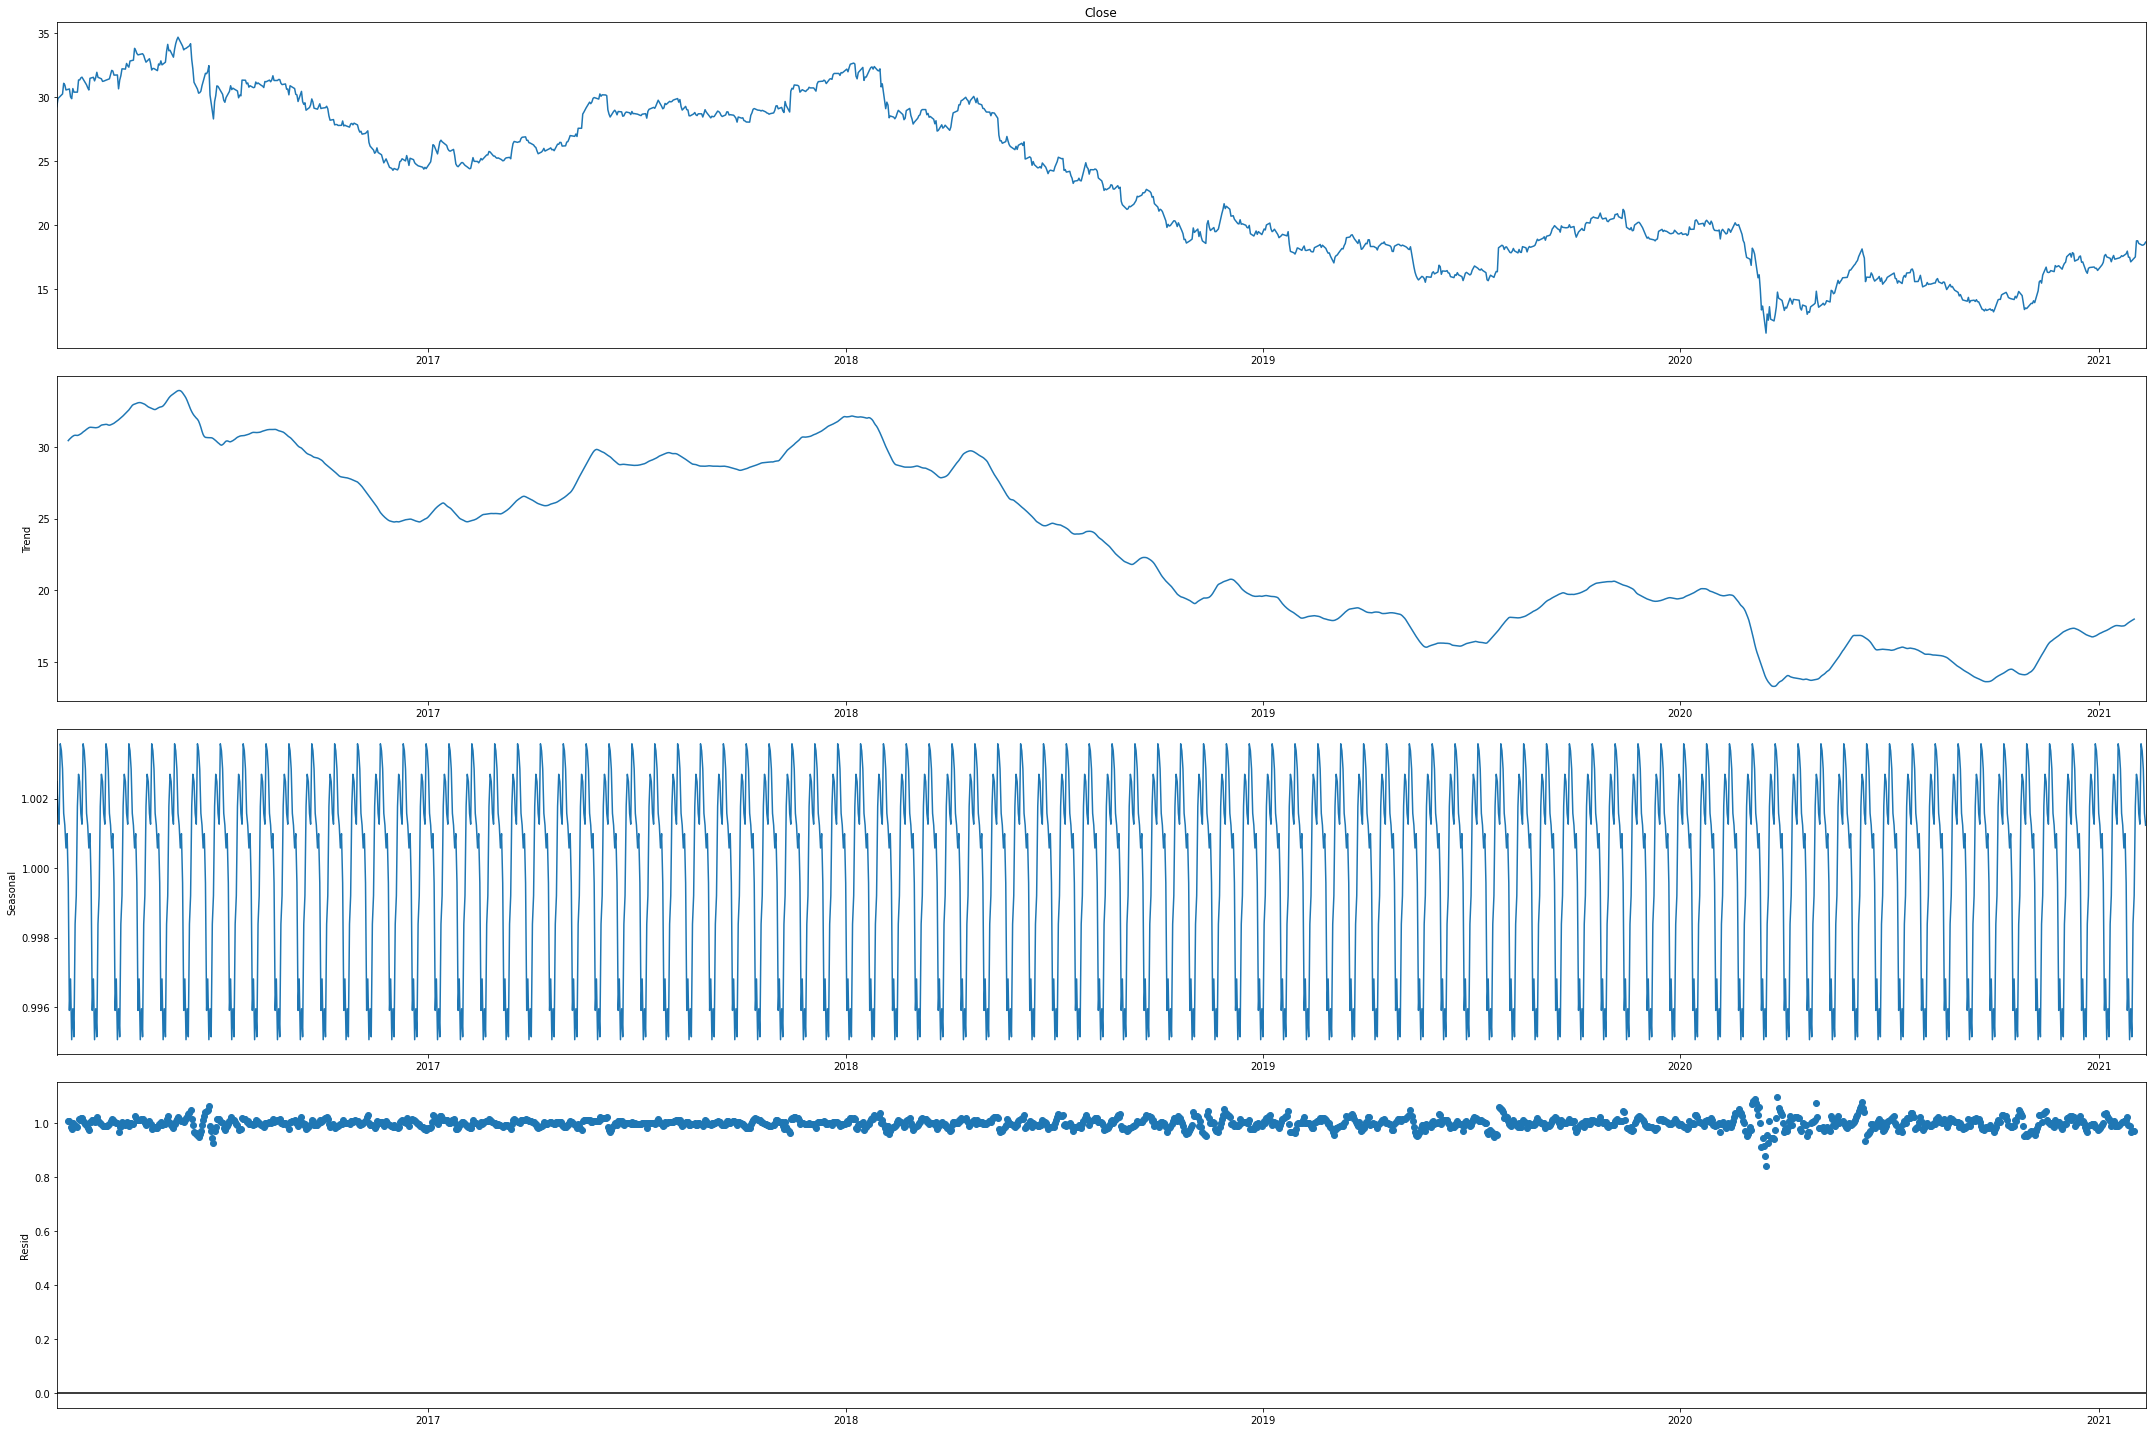

In [57]:
sesonal_decomposition_multiplicative_20 = plot_decomposition(data_no_missing.Close, 'multiplicative', 20)

##### Тест на стаціонарність для залишків

In [58]:
stationarity_test(sesonal_decomposition_multiplicative_20.resid.dropna(), smt.adfuller)

{'adfuller_statistics': -12.969482066859548,
 'adfuller_p_value': 3.1028460195163162e-24,
 'adfuller_critical_values': {'1%': -3.4340249409468155,
  '5%': -2.8631632820375903,
  '10%': -2.5676341842417187}}

In [59]:
stationarity_test(sesonal_decomposition_multiplicative_20.resid.dropna(), smt.kpss)

{'kpss_statistics': 0.029767313939175324,
 'kpss_p_value': 0.1,
 'kpss_critical_values': {'10%': 0.347,
  '5%': 0.463,
  '2.5%': 0.574,
  '1%': 0.739}}

#### Multiplicative model

##### period=253

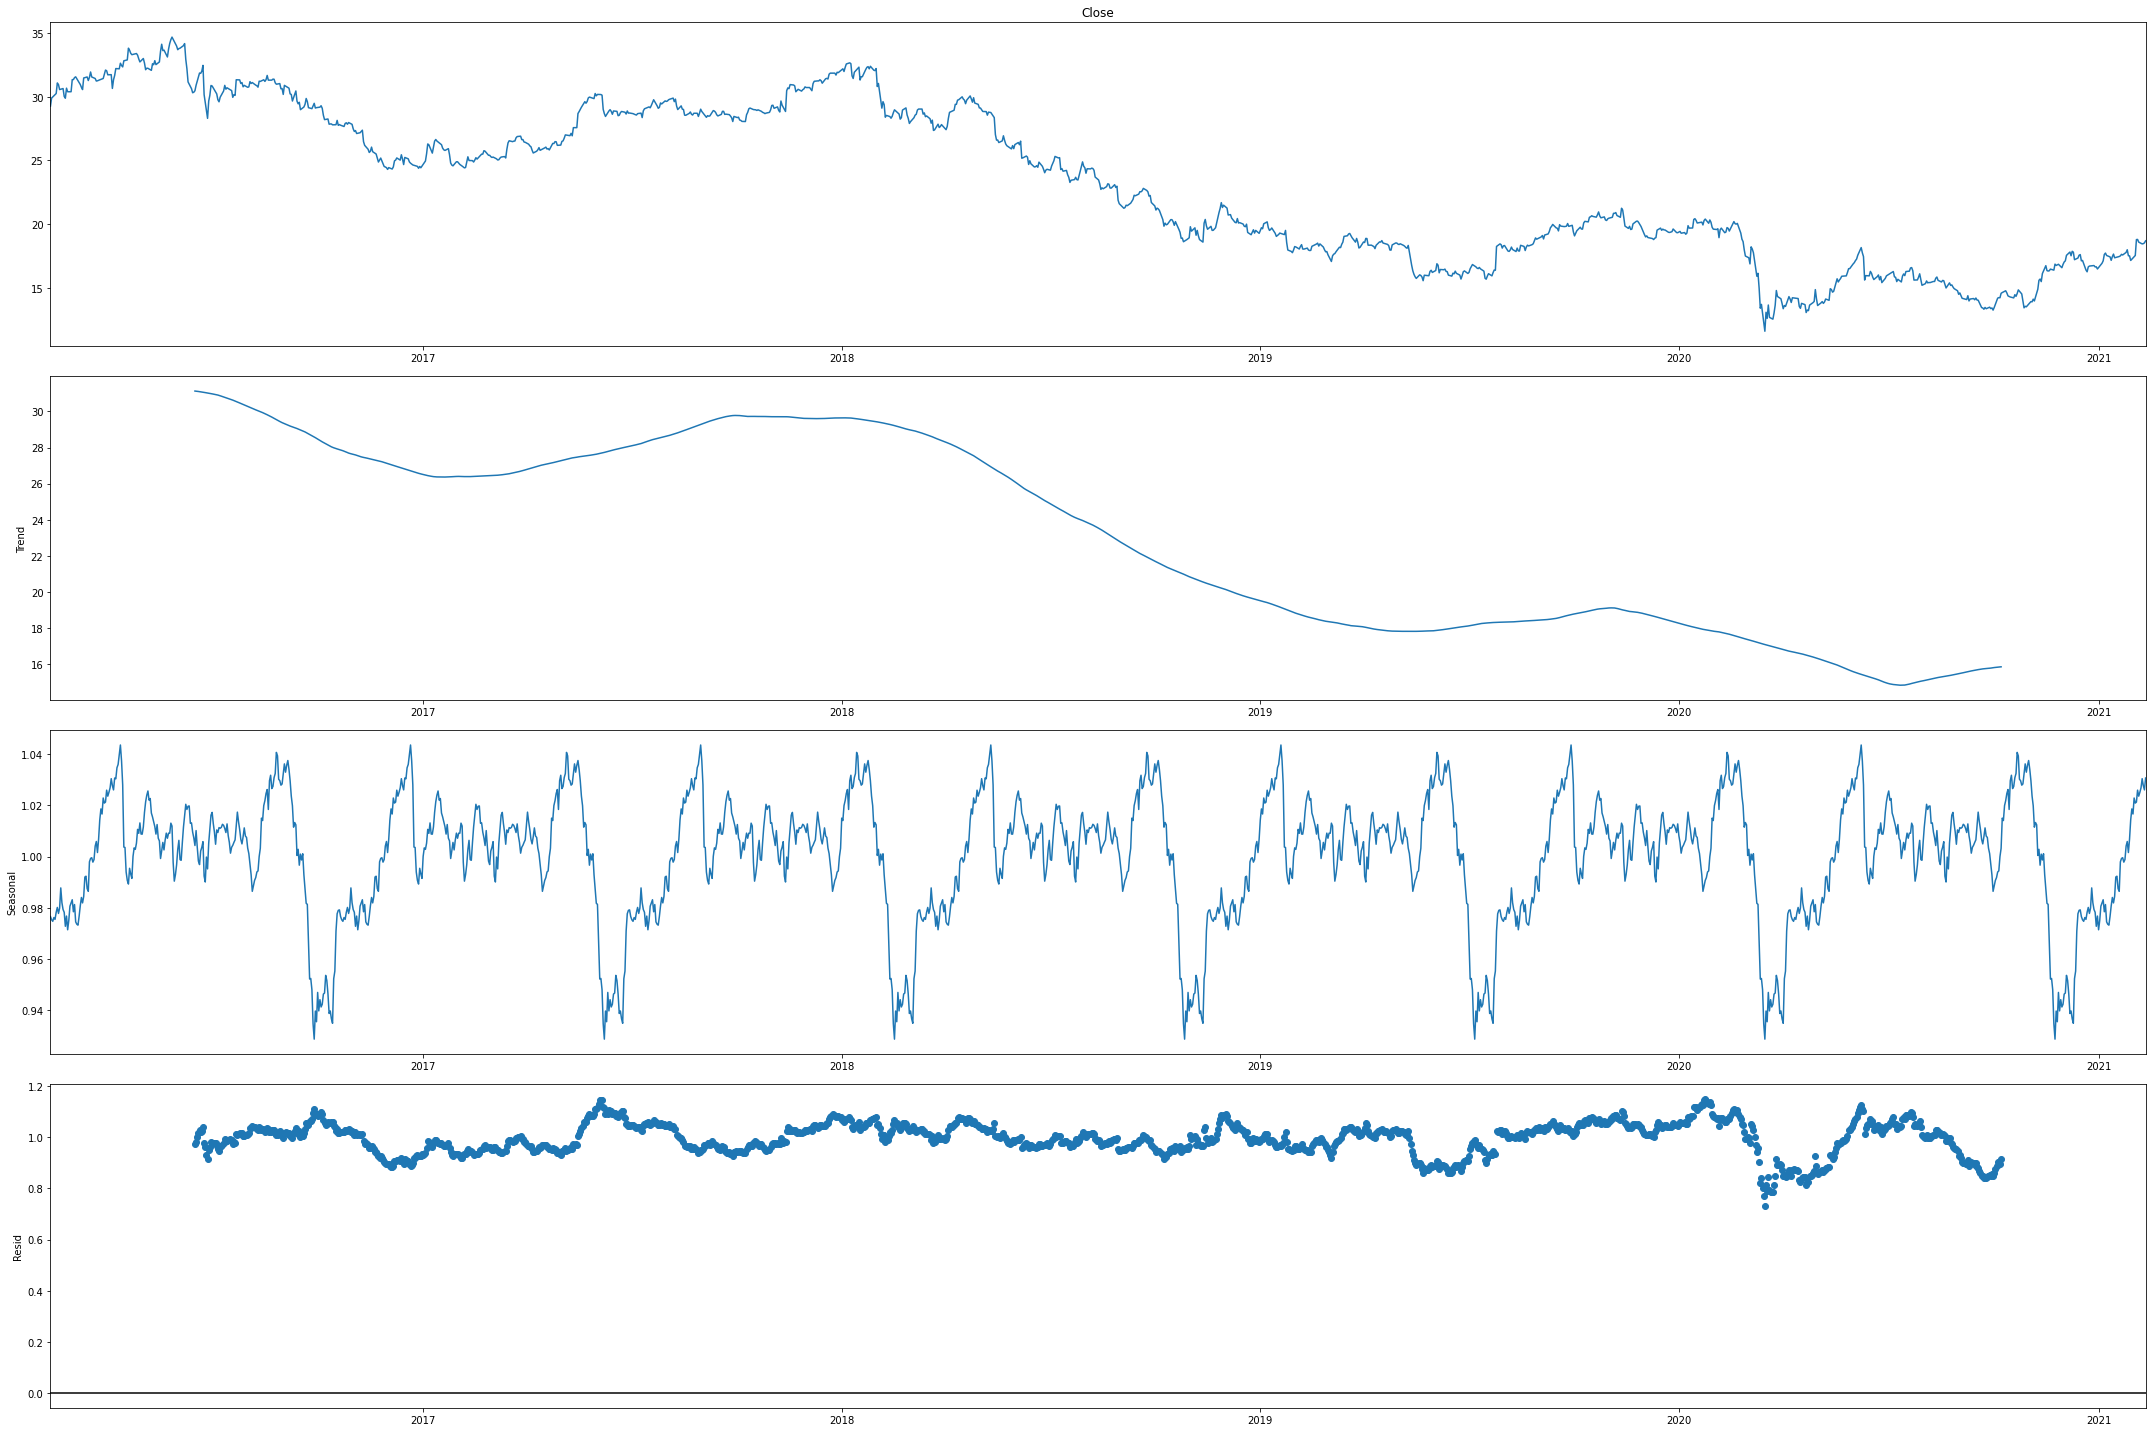

In [60]:
sesonal_decomposition_multiplicative_253 = plot_decomposition(data_no_missing.Close, 'multiplicative', 253)

##### Тест на стаціонарність для залишків

In [61]:
stationarity_test(sesonal_decomposition_multiplicative_253.resid.dropna(), smt.adfuller)

{'adfuller_statistics': -4.185755600115316,
 'adfuller_p_value': 0.00069645297351933,
 'adfuller_critical_values': {'1%': -3.4345487774977768,
  '5%': -2.8633945067663817,
  '10%': -2.5677573081032214}}

In [62]:
stationarity_test(sesonal_decomposition_multiplicative_253.resid.dropna(), smt.kpss)

{'kpss_statistics': 0.09682880596583154,
 'kpss_p_value': 0.1,
 'kpss_critical_values': {'10%': 0.347,
  '5%': 0.463,
  '2.5%': 0.574,
  '1%': 0.739}}

## Побудова моделей за допомогою крос-валідації для різних наборів порядків

In [63]:
data_no_missing = data_no_missing.reset_index(drop=False)

In [64]:
data_no_missing.head(2)

Date_index        Date   Open       High        Low  Close     Volume  year  \
0 2016-02-11  2016-02-11  29.33  29.510000  29.030001  29.27  4805000.0  2016   
1 2016-02-12  2016-02-12  29.52  29.950001  29.410000  29.90  3116500.0  2016   

   quarter  month  
0        1      2  
1        1      2

In [66]:
ORDERS_RANGE = range(1, 11)

In [67]:
N_SPLITS = 7

In [68]:
INDEX = pd.MultiIndex.from_product((ORDERS_RANGE, ORDERS_RANGE, list(range(N_SPLITS))))

In [69]:
def get_cross_val_results(data, n_splits, test_size, lags, orders_range=ORDERS_RANGE, plot=False):
    
    all_metrics_df_arma = pd.DataFrame()
    all_metrics_df_test_arma = pd.DataFrame()
    
    all_metrics_df_ar = pd.DataFrame()
    all_metrics_df_test_ar = pd.DataFrame()
    
    for p, q in tqdm(product(orders_range, orders_range)):
        
        metrics_df_arma, metrics_df_test_arma, metrics_df_ar, metrics_df_test_ar = make_cross_validation(
            data, n_splits=n_splits, test_size=test_size, lags=lags, ar_order=(p, 0), arma_order=(p, q),
            plot=plot)
        
        all_metrics_df_arma = pd.concat((all_metrics_df_arma, metrics_df_arma))
        all_metrics_df_test_arma = pd.concat((all_metrics_df_test_arma, metrics_df_test_arma))
        
        all_metrics_df_ar = pd.concat((all_metrics_df_ar, metrics_df_ar))
        all_metrics_df_test_ar = pd.concat((all_metrics_df_test_ar, metrics_df_test_ar))
        
    return all_metrics_df_arma, all_metrics_df_test_arma, all_metrics_df_ar, all_metrics_df_test_ar

In [70]:
all_metrics_df_arma, all_metrics_df_test_arma, all_metrics_df_ar, all_metrics_df_test_ar = get_cross_val_results(
    data_no_missing, N_SPLITS, 100, 30)

7it [01:05, 10.37s/it]

IDX: 0, P: 1, Q: 7


8it [01:05,  7.16s/it]

IDX: 0, P: 1, Q: 8


9it [01:05,  5.01s/it]

IDX: 0, P: 1, Q: 9


10it [01:06,  3.55s/it]

IDX: 0, P: 1, Q: 10


20it [06:30, 48.91s/it]

IDX: 2, P: 2, Q: 10


30it [12:03, 51.39s/it]

IDX: 2, P: 3, Q: 10


37it [14:17, 26.33s/it]

IDX: 2, P: 4, Q: 7


38it [14:41, 25.49s/it]

IDX: 2, P: 4, Q: 8


39it [14:58, 22.98s/it]

IDX: 2, P: 4, Q: 9


40it [15:56, 33.41s/it]

IDX: 2, P: 4, Q: 10


47it [19:33, 35.74s/it]

IDX: 2, P: 5, Q: 7


48it [20:22, 39.87s/it]

IDX: 3, P: 5, Q: 8


49it [20:49, 36.02s/it]

IDX: 2, P: 5, Q: 9


50it [21:42, 41.07s/it]

IDX: 2, P: 5, Q: 10


55it [23:15, 21.76s/it]

IDX: 2, P: 6, Q: 5


56it [23:42, 23.38s/it]

IDX: 2, P: 6, Q: 6


58it [25:14, 33.95s/it]

IDX: 3, P: 6, Q: 8


59it [26:47, 51.56s/it]

IDX: 3, P: 6, Q: 9


60it [27:50, 55.11s/it]

IDX: 2, P: 6, Q: 10


65it [33:06, 58.68s/it]

IDX: 2, P: 7, Q: 5


66it [33:29, 48.17s/it]

IDX: 2, P: 7, Q: 6


67it [34:35, 53.54s/it]

IDX: 3, P: 7, Q: 7


68it [35:33, 54.64s/it]

IDX: 3, P: 7, Q: 8


69it [36:46, 60.32s/it]

IDX: 2, P: 7, Q: 9


70it [37:22, 52.86s/it]

IDX: 1, P: 7, Q: 10


74it [43:12, 70.67s/it]

IDX: 2, P: 8, Q: 4


75it [44:01, 64.16s/it]

IDX: 2, P: 8, Q: 5


76it [44:35, 55.29s/it]

IDX: 2, P: 8, Q: 6


78it [47:26, 66.66s/it]

IDX: 2, P: 8, Q: 8


79it [47:31, 48.28s/it]

IDX: 0, P: 8, Q: 9


80it [47:37, 35.59s/it]

IDX: 0, P: 8, Q: 10


82it [50:47, 64.26s/it]

IDX: 4, P: 9, Q: 2


83it [51:53, 64.91s/it]

IDX: 3, P: 9, Q: 3


84it [52:38, 58.92s/it]

IDX: 2, P: 9, Q: 4


85it [53:37, 58.86s/it]

IDX: 2, P: 9, Q: 5


86it [54:20, 54.12s/it]

IDX: 2, P: 9, Q: 6


87it [54:58, 49.20s/it]

IDX: 1, P: 9, Q: 7


88it [55:25, 42.58s/it]

IDX: 1, P: 9, Q: 8


89it [55:33, 32.20s/it]

IDX: 0, P: 9, Q: 9


90it [55:40, 24.88s/it]

IDX: 0, P: 9, Q: 10


92it [1:00:59, 91.19s/it]

IDX: 4, P: 10, Q: 2


93it [1:01:32, 73.81s/it]

IDX: 1, P: 10, Q: 3


94it [1:03:15, 82.64s/it]

IDX: 2, P: 10, Q: 4


95it [1:04:41, 83.65s/it]

IDX: 2, P: 10, Q: 5


96it [1:06:21, 88.35s/it]

IDX: 2, P: 10, Q: 6


97it [1:07:17, 78.77s/it]

IDX: 1, P: 10, Q: 7


98it [1:07:53, 65.77s/it]

IDX: 1, P: 10, Q: 8


99it [1:08:03, 49.02s/it]

IDX: 0, P: 10, Q: 9


100it [1:08:12, 40.93s/it]

IDX: 0, P: 10, Q: 10


In [71]:
all_metrics_df_arma.head()

RMSE         RSS       MSE       MAE      MAPE        R2  \
(1, 1, 0)  0.355832  142.822990  0.126616  0.216802  0.008130  0.992750   
(1, 1, 1)  0.335239  126.770642  0.112385  0.205070  0.008160  0.994842   
(1, 1, 2)  0.326475  120.228901  0.106586  0.199987  0.008418  0.995336   
(1, 1, 3)  0.312534  110.180051  0.097677  0.190383  0.008254  0.995766   
(1, 1, 4)  0.370697  155.005605  0.137416  0.218120  0.010264  0.994934   

           durbin_watson          aic          bic  
(1, 1, 0)       2.042583 -2325.119615 -2310.035011  
(1, 1, 1)       2.016626 -2459.607160 -2444.522556  
(1, 1, 2)       1.968391 -2519.370913 -2504.286309  
(1, 1, 3)       2.007580 -2617.824530 -2602.739926  
(1, 1, 4)       2.002262 -2232.786892 -2217.702288

In [87]:
idx = all_metrics_df_arma.index.tolist()
idx = [tuple(list(map(int, el.replace('(', '').replace(')', '').split(', ')))) for el in idx]
idx = pd.MultiIndex.from_tuples(idx, names=['P', 'Q', 'Fold Number'])

all_metrics_df_arma.index = idx

In [88]:
all_metrics_df_arma.head()

RMSE         RSS       MSE       MAE      MAPE        R2  \
P Q Fold Number                                                                 
1 1 0            0.355832  142.822990  0.126616  0.216802  0.008130  0.992750   
    1            0.335239  126.770642  0.112385  0.205070  0.008160  0.994842   
    2            0.326475  120.228901  0.106586  0.199987  0.008418  0.995336   
    3            0.312534  110.180051  0.097677  0.190383  0.008254  0.995766   
    4            0.370697  155.005605  0.137416  0.218120  0.010264  0.994934   

                 durbin_watson          aic          bic  
P Q Fold Number                                           
1 1 0                 2.042583 -2325.119615 -2310.035011  
    1                 2.016626 -2459.607160 -2444.522556  
    2                 1.968391 -2519.370913 -2504.286309  
    3                 2.007580 -2617.824530 -2602.739926  
    4                 2.002262 -2232.786892 -2217.702288

In [89]:
idx = all_metrics_df_test_arma.index.tolist()
idx = [tuple(list(map(int, el.replace('(', '').replace(')', '').split(', ')))) for el in idx]
idx = pd.MultiIndex.from_tuples(idx, names=['P', 'Q', 'Fold Number'])

all_metrics_df_test_arma.index = idx

In [90]:
all_metrics_df_test_arma.head()

RMSE        RSS       MSE       MAE      MAPE        R2  \
P Q Fold Number                                                                
1 1 0            0.199725   3.989019  0.039890  0.136175  0.007870  0.971710   
    1            0.266160   7.084140  0.070841  0.142656  0.007994  0.961977   
    2            0.186904   3.493324  0.034933  0.120744  0.006046  0.906160   
    3            0.452306  20.458108  0.204581  0.299875  0.019375  0.976064   
    4            0.309901   9.603844  0.096038  0.195896  0.012715  0.928230   

                 durbin_watson         aic         bic  
P Q Fold Number                                         
1 1 0                 2.042583 -316.162481 -308.346970  
    1                 2.016626 -258.731167 -250.915657  
    2                 1.968391 -329.431633 -321.616122  
    3                 2.007580 -152.679090 -144.863579  
    4                 2.002262 -228.300679 -220.485168

In [91]:
idx = all_metrics_df_ar.index.tolist()
idx = [tuple(list(map(int, el.replace('(', '').replace(')', '').split(', ')))) for el in idx]
idx = pd.MultiIndex.from_tuples(idx, names=['P', 'Q', 'Fold Number'])

all_metrics_df_ar.index = idx

In [92]:
all_metrics_df_ar.head()

RMSE         RSS       MSE       MAE      MAPE        R2  \
P Q Fold Number                                                                 
1 0 0            0.324809  119.005291  0.105501  0.216761  0.008144  0.993959   
    1            0.309103  107.774703  0.095545  0.205739  0.008190  0.995615   
    2            0.290934   95.476646  0.084642  0.194519  0.008195  0.996296   
    3            0.281592   89.443897  0.079294  0.186205  0.008072  0.996563   
    4            0.338974  129.610740  0.114903  0.217722  0.010253  0.995764   

                 durbin_watson          aic          bic  
P Q Fold Number                                           
1 0 0                 2.281557 -2532.909767 -2522.853364  
    1                 2.281591 -2644.722747 -2634.666344  
    2                 2.313043 -2781.392684 -2771.336281  
    3                 2.302493 -2855.017351 -2844.960948  
    4                 2.298073 -2436.615001 -2426.558598

In [93]:
idx = all_metrics_df_test_ar.index.tolist()
idx = [tuple(list(map(int, el.replace('(', '').replace(')', '').split(', ')))) for el in idx]
idx = pd.MultiIndex.from_tuples(idx, names=['P', 'Q', 'Fold Number'])

all_metrics_df_test_ar.index = idx

In [94]:
all_metrics_df_test_ar.head()

RMSE        RSS       MSE       MAE      MAPE        R2  \
P Q Fold Number                                                                
1 0 0            0.199725   3.989019  0.039890  0.136175  0.007870  0.971710   
    1            0.266160   7.084140  0.070841  0.142656  0.007994  0.961977   
    2            0.186904   3.493324  0.034933  0.120744  0.006046  0.906160   
    3            0.452306  20.458108  0.204581  0.299875  0.019375  0.976064   
    4            0.309901   9.603844  0.096038  0.195896  0.012715  0.928230   

                 durbin_watson         aic         bic  
P Q Fold Number                                         
1 0 0                 2.281557 -318.162481 -312.952140  
    1                 2.281591 -260.731167 -255.520827  
    2                 2.313043 -331.431633 -326.221292  
    3                 2.302493 -154.679090 -149.468749  
    4                 2.298073 -230.300679 -225.090338

### Розподіл метрик по порядкам моделей

### ARMA

#### Тренувальні вибірки

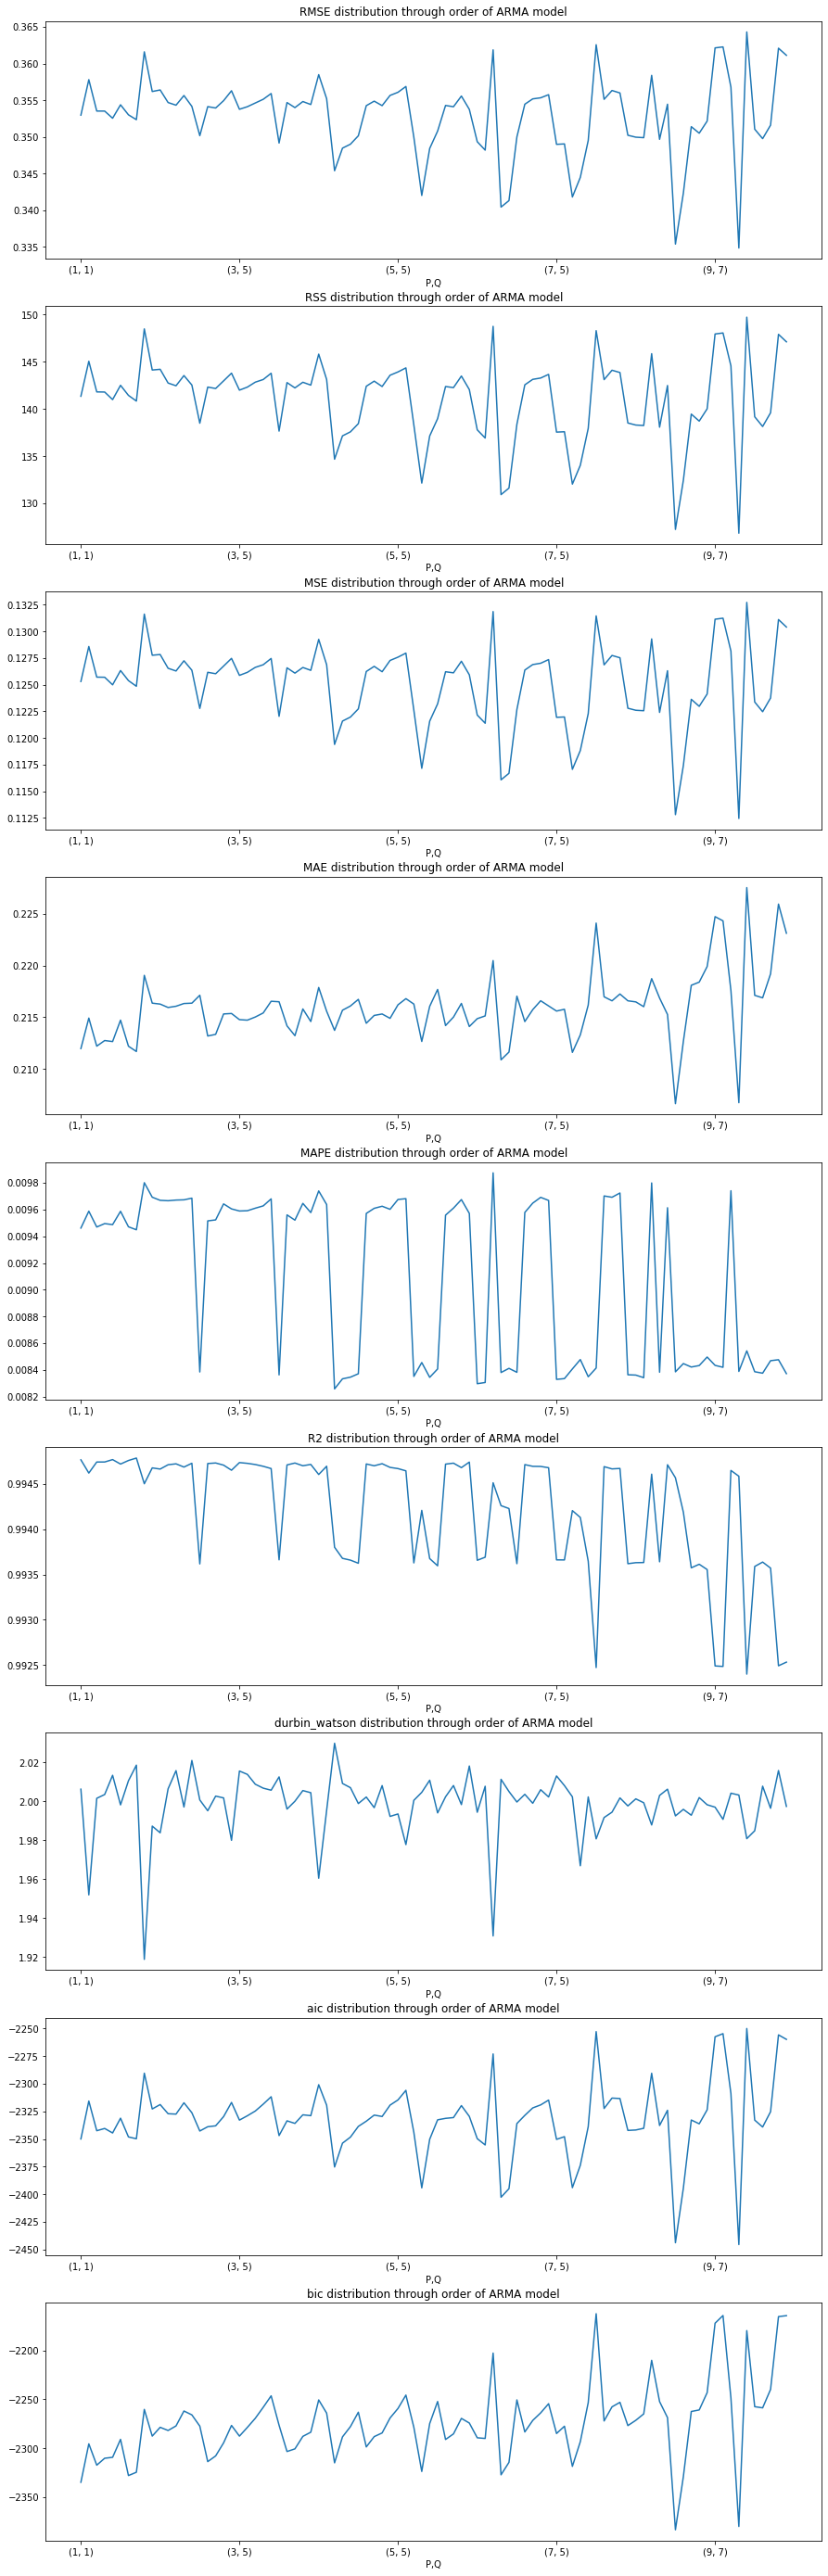

In [97]:
fig, axs = plt.subplots(nrows=all_metrics_df_arma.shape[1], ncols=1, figsize=(15, 50))

for idx, metric_title in enumerate(all_metrics_df_arma.columns):
    all_metrics_df_arma.reset_index().groupby(['P', 'Q'])[metric_title].mean().plot(
        title='{} distribution through order of ARMA model'.format(metric_title), ax=axs[idx]);

#### Тестувальні вибірки

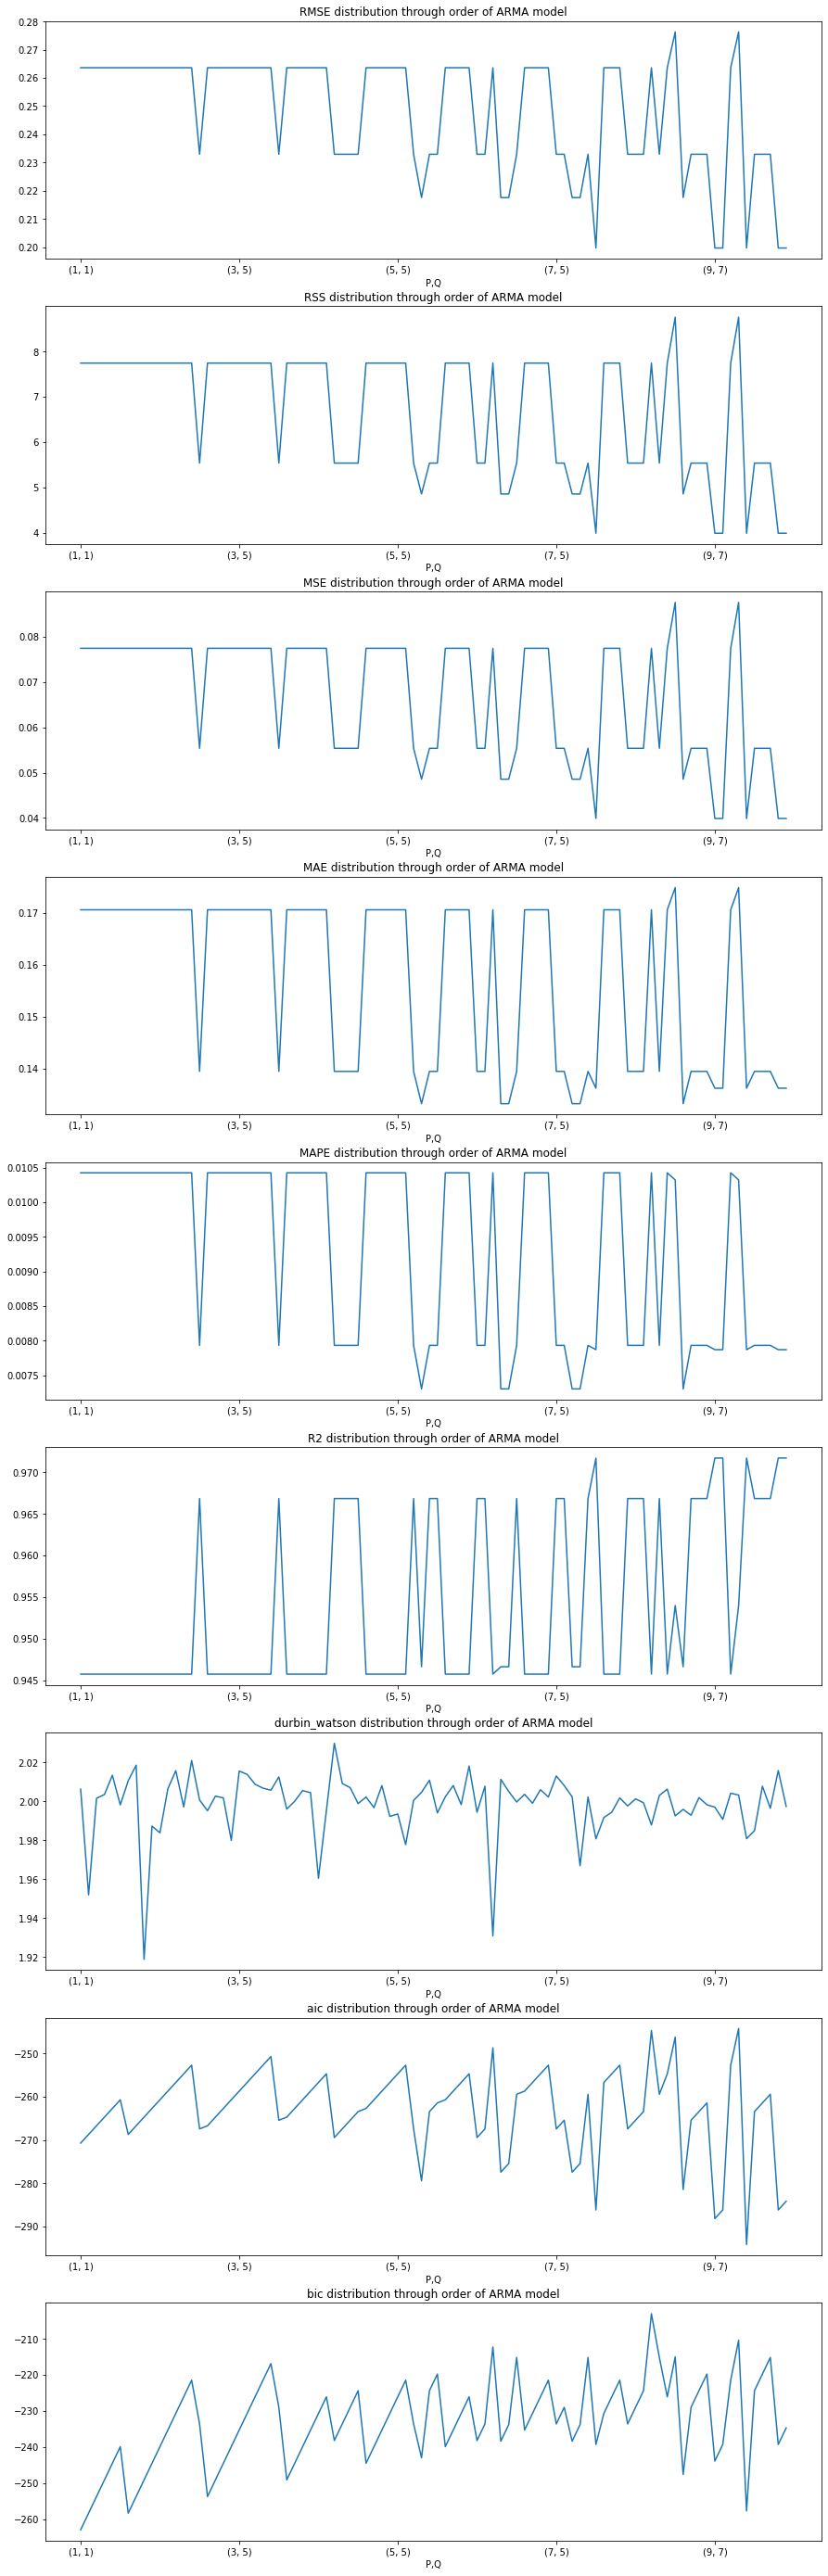

In [98]:
fig, axs = plt.subplots(nrows=all_metrics_df_test_arma.shape[1], ncols=1, figsize=(15, 50))

for idx, metric_title in enumerate(all_metrics_df_test_arma.columns):
    all_metrics_df_test_arma.reset_index().groupby(['P', 'Q'])[metric_title].mean().plot(
        title='{} distribution through order of ARMA model'.format(metric_title), ax=axs[idx]);

### Побудова ACF та PACF для кожного з фолдів

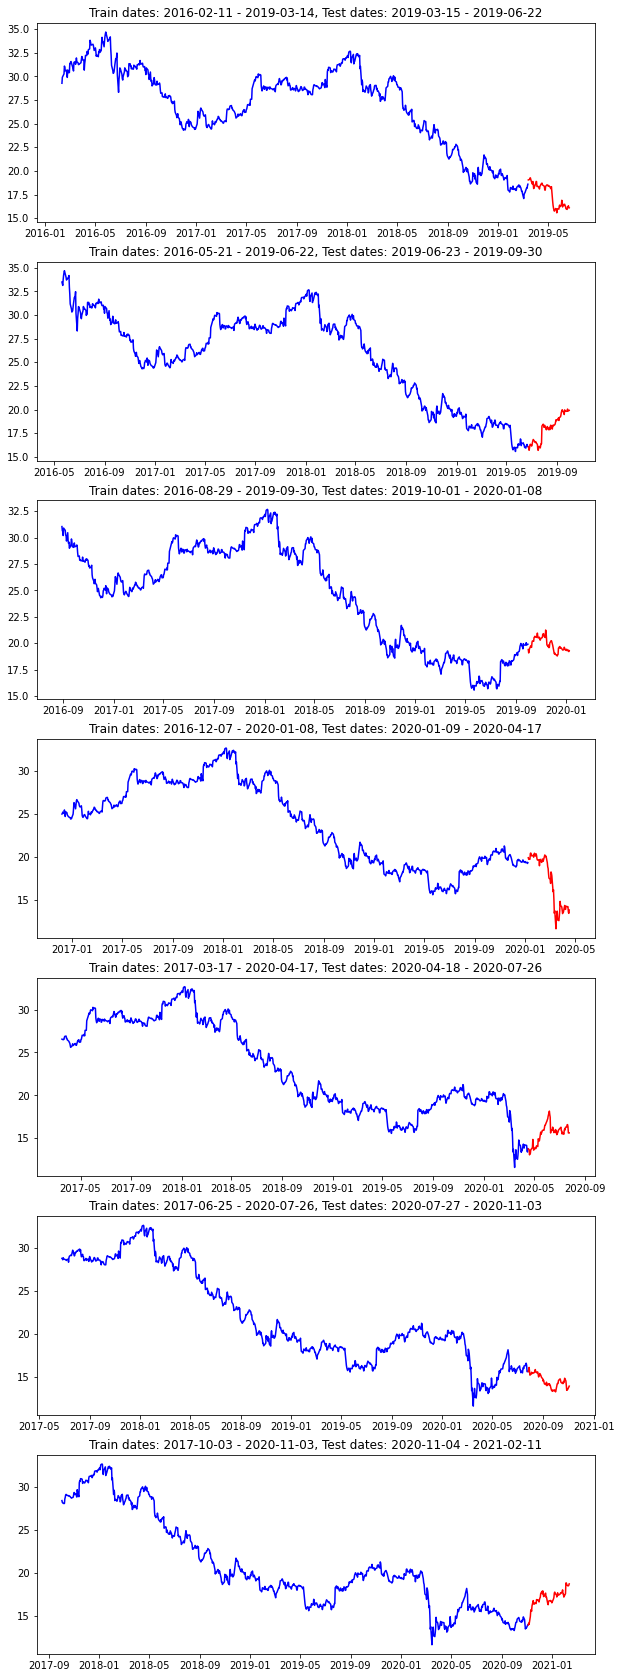

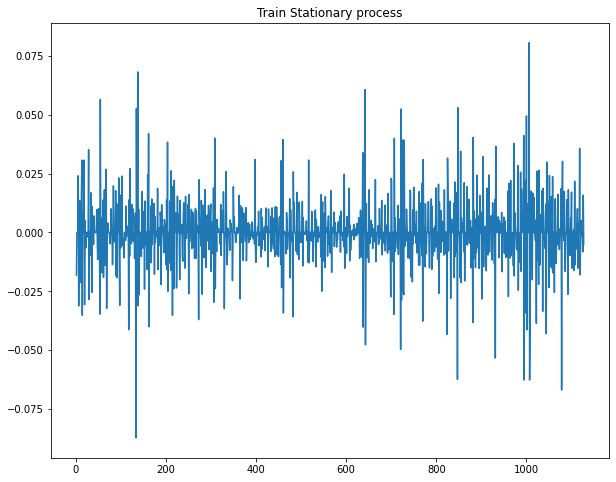

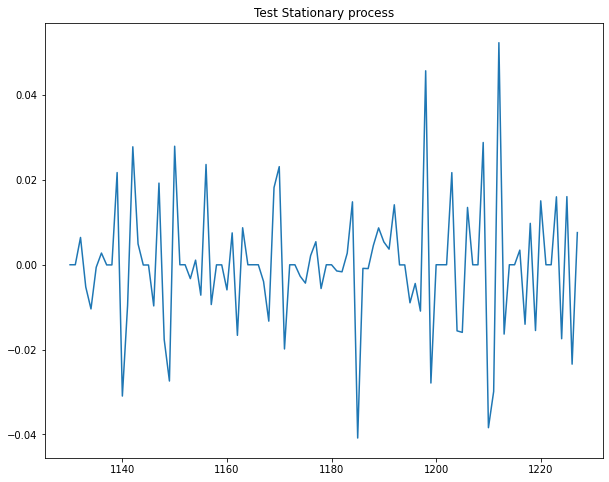

<Figure size 720x576 with 0 Axes>

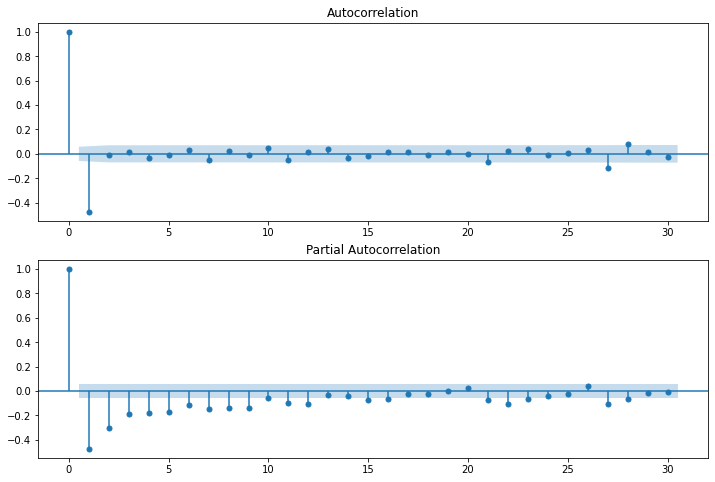

<Figure size 720x576 with 0 Axes>

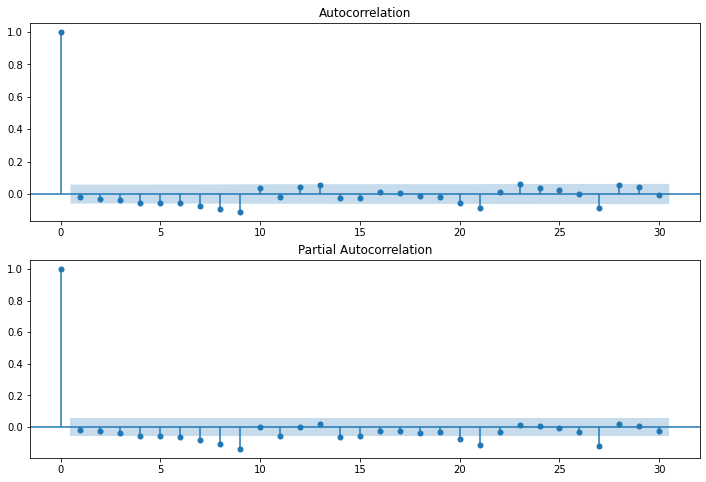

IDX: 0, P: 8, Q: 9


In [125]:
(all_metrics_df_arma_selected, all_metrics_df_test_arma_selected, all_metrics_df_ar_selected,
 all_metrics_df_test_ar_selected) = make_cross_validation(data_no_missing, n_splits=N_SPLITS, test_size=100, 
                                                          lags=30, ar_order=(8, 0), arma_order=(8, 9), 
                                                          plot=True
                                                         )

## Метрики у вигляді таблиць

### ARMA

In [103]:
all_metrics_df_arma.shape, all_metrics_df_test_arma.shape

((439, 9), (439, 9))

In [104]:
all_metrics_df_arma.head(3)

RMSE         RSS       MSE       MAE      MAPE        R2  \
P Q Fold Number                                                                 
1 1 0            0.355832  142.822990  0.126616  0.216802  0.008130  0.992750   
    1            0.335239  126.770642  0.112385  0.205070  0.008160  0.994842   
    2            0.326475  120.228901  0.106586  0.199987  0.008418  0.995336   

                 durbin_watson          aic          bic  
P Q Fold Number                                           
1 1 0                 2.042583 -2325.119615 -2310.035011  
    1                 2.016626 -2459.607160 -2444.522556  
    2                 1.968391 -2519.370913 -2504.286309

In [105]:
all_metrics_df_test_arma.head(3)

RMSE       RSS       MSE       MAE      MAPE        R2  \
P Q Fold Number                                                               
1 1 0            0.199725  3.989019  0.039890  0.136175  0.007870  0.971710   
    1            0.266160  7.084140  0.070841  0.142656  0.007994  0.961977   
    2            0.186904  3.493324  0.034933  0.120744  0.006046  0.906160   

                 durbin_watson         aic         bic  
P Q Fold Number                                         
1 1 0                 2.042583 -316.162481 -308.346970  
    1                 2.016626 -258.731167 -250.915657  
    2                 1.968391 -329.431633 -321.616122

#### усереднюємо метрики по фолдам для кожного набору порядків моделі

In [106]:
all_train_metrics_resampled_arma = all_metrics_df_arma.reset_index().groupby(
    ['P', 'Q']).mean().drop('Fold Number', axis=1)

all_test_metrics_resampled_arma = all_metrics_df_test_arma.reset_index().groupby(
    ['P', 'Q']).mean().drop('Fold Number', axis=1)

In [112]:
pd.set_option('display.max.rows', None)

In [115]:
all_train_metrics_resampled_arma

RMSE         RSS       MSE       MAE      MAPE        R2  \
P  Q                                                                  
1  1   0.352968  141.343770  0.125305  0.211973  0.009462  0.994768   
   2   0.357808  145.047011  0.128588  0.214923  0.009588  0.994622   
   3   0.353528  141.803108  0.125712  0.212204  0.009469  0.994744   
   4   0.353523  141.789660  0.125700  0.212749  0.009495  0.994744   
   5   0.352548  140.988720  0.124990  0.212650  0.009487  0.994770   
   6   0.354381  142.500849  0.126331  0.214723  0.009587  0.994721   
2  1   0.353013  141.434825  0.125385  0.212198  0.009471  0.994760   
   2   0.352351  140.834518  0.124853  0.211686  0.009449  0.994788   
   3   0.361603  148.473660  0.131626  0.219063  0.009801  0.994503   
   4   0.356193  144.120737  0.127767  0.216370  0.009693  0.994679   
   5   0.356404  144.196850  0.127834  0.216278  0.009669  0.994666   
   6   0.354689  142.740865  0.126543  0.215949  0.009666  0.994713   
   7   0.354326  142.453741  0.126289  0.216070  0.009671  0.994724   
   8   0.355646  143.533979  0.127246  0.216334  0.009673  0.994688   
   9   0.354160  142.529696  0.126356  0.216368  0.009686  0.994730   
   10  0.350171  138.491226  0.122776  0.217135  0.008384  0.993618   
3  1   0.354129  142.314198  0.126165  0.213187  0.009515  0.994727   
   2   0.353943  142.162914  0.126031  0.213346  0.009523  0.994733   
   3   0.354940  142.970137  0.126747  0.215323  0.009643  0.994709   
   4   0.356296  143.786897  0.127471  0.215369  0.009605  0.994653   
   5   0.353771  141.989960  0.125878  0.214771  0.009589  0.994737   
   6   0.354120  142.310703  0.126162  0.214722  0.009591  0.994729   
   7   0.354626  142.835472  0.126627  0.215027  0.009610  0.994716   
   8   0.355132  143.114733  0.126875  0.215420  0.009628  0.994696   
   9   0.355916  143.778521  0.127463  0.216551  0.009680  0.994671   
   10  0.349166  137.653656  0.122033  0.216504  0.008362  0.993663   
4  1   0.354687  142.789044  0.126586  0.214170  0.009560  0.994711   
   2   0.353997  142.226916  0.126088  0.213219  0.009521  0.994732   
   3   0.354824  142.825845  0.126619  0.215808  0.009647  0.994702   
   4   0.354418  142.522183  0.126349  0.214591  0.009578  0.994717   
   5   0.358492  145.799750  0.129255  0.217886  0.009740  0.994606   
   6   0.355214  143.117383  0.126877  0.215587  0.009638  0.994697   
   7   0.345390  134.680028  0.119397  0.213735  0.008257  0.993802   
   8   0.348470  137.150744  0.121588  0.215685  0.008333  0.993679   
   9   0.349007  137.574960  0.121964  0.216094  0.008345  0.993660   
   10  0.350156  138.444191  0.122734  0.216736  0.008371  0.993625   
5  1   0.354260  142.398797  0.126240  0.214422  0.009571  0.994722   
   2   0.354879  142.943992  0.126723  0.215180  0.009609  0.994702   
   3   0.354265  142.373985  0.126218  0.215320  0.009625  0.994725   
   4   0.355658  143.567656  0.127276  0.214898  0.009602  0.994684   
   5   0.356087  143.917833  0.127587  0.216208  0.009676  0.994671   
   6   0.356876  144.345654  0.127966  0.216804  0.009682  0.994646   
   7   0.349967  138.309894  0.122615  0.216281  0.008351  0.993629   
   8   0.342017  132.152149  0.117156  0.212659  0.008455  0.994209   
   9   0.348429  137.140826  0.121579  0.216061  0.008344  0.993677   
   10  0.350798  138.975320  0.123205  0.217694  0.008406  0.993597   
6  1   0.354290  142.373329  0.126217  0.214200  0.009558  0.994720   
   2   0.354115  142.257266  0.126115  0.215019  0.009611  0.994731   
   3   0.355573  143.483021  0.127201  0.216342  0.009675  0.994682   
   4   0.353755  142.049086  0.125930  0.214104  0.009571  0.994743   
   5   0.349346  137.788423  0.122153  0.214867  0.008296  0.993658   
   6   0.348200  136.922482  0.121385  0.215133  0.008305  0.993692   
   7   0.361874  148.743328  0.131865  0.220492  0.009875  0.994514   
   8   0.340436  130.934670  0.116077  0.210883  0.008380  0.994262   
   9   0.341314  131.621346  0.1166

In [116]:
all_test_metrics_resampled_arma

RMSE       RSS       MSE       MAE      MAPE        R2  \
P  Q                                                                
1  1   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   2   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   3   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   4   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   5   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   6   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
2  1   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   2   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   3   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   4   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   5   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   6   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   7   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   8   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   9   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   10  0.232943  5.536580  0.055366  0.139415  0.007932  0.966843   
3  1   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   2   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   3   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   4   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   5   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   6   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   7   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   8   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   9   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   10  0.232943  5.536580  0.055366  0.139415  0.007932  0.966843   
4  1   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   2   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   3   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   4   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   5   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   6   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   7   0.232943  5.536580  0.055366  0.139415  0.007932  0.966843   
   8   0.232943  5.536580  0.055366  0.139415  0.007932  0.966843   
   9   0.232943  5.536580  0.055366  0.139415  0.007932  0.966843   
   10  0.232943  5.536580  0.055366  0.139415  0.007932  0.966843   
5  1   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   2   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   3   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   4   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   5   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   6   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   7   0.232943  5.536580  0.055366  0.139415  0.007932  0.966843   
   8   0.217597  4.855495  0.048555  0.133192  0.007303  0.946615   
   9   0.232943  5.536580  0.055366  0.139415  0.007932  0.966843   
   10  0.232943  5.536580  0.055366  0.139415  0.007932  0.966843   
6  1   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   2   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   3   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   4   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   5   0.232943  5.536580  0.055366  0.139415  0.007932  0.966843   
   6   0.232943  5.536580  0.055366  0.139415  0.007932  0.966843   
   7   0.263594  7.743024  0.077430  0.170583  0.010423  0.945731   
   8   0.217597  4.855495  0.048555  0.133192  0.007303  0.946615   
   9   0.217597  4.855495  0.048555  0.133192  0.007303  0.946615   
   10  0.232943  5.536580  0.055366  0.139415  0.007932  0.966843   
7  1   0.

### AR

In [117]:
all_metrics_df_ar.shape, all_metrics_df_test_ar.shape

((488, 9), (488, 9))

In [118]:
all_metrics_df_ar.head(3)

RMSE         RSS       MSE       MAE      MAPE        R2  \
P Q Fold Number                                                                 
1 0 0            0.324809  119.005291  0.105501  0.216761  0.008144  0.993959   
    1            0.309103  107.774703  0.095545  0.205739  0.008190  0.995615   
    2            0.290934   95.476646  0.084642  0.194519  0.008195  0.996296   

                 durbin_watson          aic          bic  
P Q Fold Number                                           
1 0 0                 2.281557 -2532.909767 -2522.853364  
    1                 2.281591 -2644.722747 -2634.666344  
    2                 2.313043 -2781.392684 -2771.336281

In [119]:
all_metrics_df_test_ar.head(3)

RMSE       RSS       MSE       MAE      MAPE        R2  \
P Q Fold Number                                                               
1 0 0            0.199725  3.989019  0.039890  0.136175  0.007870  0.971710   
    1            0.266160  7.084140  0.070841  0.142656  0.007994  0.961977   
    2            0.186904  3.493324  0.034933  0.120744  0.006046  0.906160   

                 durbin_watson         aic         bic  
P Q Fold Number                                         
1 0 0                 2.281557 -318.162481 -312.952140  
    1                 2.281591 -260.731167 -255.520827  
    2                 2.313043 -331.431633 -326.221292

#### усереднюємо метрики по фолдам для кожного набору порядків моделі

In [120]:
all_train_metrics_resampled_ar = all_metrics_df_ar.reset_index().groupby(
    ['P', 'Q']).mean().drop('Fold Number', axis=1)

all_test_metrics_resampled_ar = all_metrics_df_test_ar.reset_index().groupby(
    ['P', 'Q']).mean().drop('Fold Number', axis=1)

In [122]:
all_train_metrics_resampled_ar

RMSE         RSS       MSE       MAE      MAPE        R2  \
P  Q                                                                 
1  0  0.320788  116.736332  0.103490  0.210980  0.009295  0.995534   
2  0  0.331748  124.801750  0.110640  0.219617  0.009774  0.995342   
3  0  0.336223  128.319315  0.113758  0.221751  0.009894  0.995224   
4  0  0.335666  127.807130  0.113304  0.220947  0.009662  0.995096   
5  0  0.338357  129.764005  0.115039  0.220173  0.009618  0.995016   
6  0  0.337719  129.278780  0.114609  0.217860  0.009436  0.994973   
7  0  0.337805  129.291979  0.114621  0.217273  0.009324  0.994890   
8  0  0.343651  133.877056  0.118685  0.220627  0.009509  0.994715   
9  0  0.339853  130.745184  0.115909  0.219518  0.009023  0.994472   
10 0  0.341482  131.964875  0.116990  0.220127  0.009026  0.994391   

      durbin_watson          aic          bic  
P  Q                                           
1  0       2.296687 -2567.569871 -2557.513468  
2  0       2.136496 -2489.261670 -2474.177066  
3  0       2.070553 -2458.133204 -2438.020398  
4  0       2.057074 -2459.026577 -2433.885570  
5  0       2.038574 -2438.133510 -2407.964301  
6  0       2.022952 -2440.402009 -2405.204599  
7  0       2.031450 -2437.369662 -2397.144051  
8  0       2.016924 -2397.297641 -2352.043828  
9  0       2.011099 -2418.747721 -2368.465707  
10 0       2.009170 -2405.656164 -2350.345948

In [123]:
all_test_metrics_resampled_ar

RMSE       RSS       MSE       MAE      MAPE        R2  \
P  Q                                                               
1  0  0.258040  7.416589  0.074166  0.167591  0.010201  0.947990   
2  0  0.261503  7.611773  0.076118  0.168884  0.010282  0.945771   
3  0  0.261503  7.611773  0.076118  0.168884  0.010282  0.945771   
4  0  0.253372  7.101351  0.071014  0.162274  0.009730  0.945928   
5  0  0.256989  7.344201  0.073442  0.164776  0.009905  0.946475   
6  0  0.257584  7.399125  0.073991  0.164770  0.009868  0.947153   
7  0  0.255640  7.268648  0.072686  0.162825  0.009702  0.948202   
8  0  0.247410  6.739253  0.067393  0.158262  0.009410  0.947221   
9  0  0.246930  6.699290  0.066993  0.155407  0.009079  0.951952   
10 0  0.241918  6.335399  0.063354  0.151621  0.008828  0.952699   

      durbin_watson         aic         bic  
P  Q                                         
1  0       2.296687 -276.674739 -271.464399  
2  0       2.136496 -272.119809 -264.304298  
3  0       2.070553 -270.119809 -259.699128  
4  0       2.057074 -273.549800 -260.523949  
5  0       2.038574 -269.279423 -253.648402  
6  0       2.022952 -267.044384 -248.808193  
7  0       2.031450 -266.215680 -245.374318  
8  0       2.016924 -269.663924 -246.217392  
9  0       2.011099 -267.692329 -241.640627  
10 0       2.009170 -268.494879 -239.838007